<h1 style = "text-align: center;"><strong>Predicting the 2023 NBA Champion using Data Science</strong></h1>
<p style = "text-align: center;">Collaborators: Ayman Chowdhury, Keshav Ganapathy, Julian Javillo, Sahit Kadthala</p>

<h2><strong>Introduction</strong></h2>

The analysis of this project was formulated with the intention of exploring the key steps involved in data science. Towards this end, we have taken it upon ourselves to investigate how an NBA team's common regular season metrics such as its average points per game, avergae rebounds per game, average field goal percentage, and so forth over the course of the year influence its probability at winning a championship. <br><br> 

For more context, the NBA stands for the National Basketball Association and is a basketball league that has featured the premier basketball players in the world since its inception roughly 75 years ago. Every single season takes place from around the start of November to the start of June and includes a tournament at the end called the playoffs whose winner is deemed the "champion." Each one can be split into two chunks -- one chunk prior to the playoff tournament (called the regular season) and the other being the playoff tournament itself. Roughly the top half of NBA teams in terms of win-to-loss ratio (also known as win-loss record) make it to the playoffs, with each team paired with another and the winner of the match-up moving on to the next stage. As such, we wish to see how teams' regular season metrics can be used to predict who the nba champion will end up being. Read this <a href = "https://usblog.betway.com/nba/how-do-the-nba-playoffs-work-nba-playoffs-explained/"> article </a> if interested in more details of how the playoffs work. <br> <br> 

The reason we focus on the NBA is multi-fold. For one, due to the nature of how basketball is played and the meticulousness of the NBA's statkeeping, there is plenty of data that exists with regard to NBA teams' regular season performance. This means that there is plenty of data that we can use to analyze and that we can utilize to showcase the essence of data science. A quick note that should be made is that other metrics exist besides a team's points per game, rebounds per game, and so forth in the form of "advanced stats," but we want to focus on more general ones since those tend to be the ones looked upon by the common fan. Another reason is the sheer relevance and importance of the NBA and its playoffs as well as what it means for millions. Right now, the NBA playoffs are taking place, so the topic is fresh in the minds of many. Just to get an idea of how much of a cultural phenomenon the NBA and its playoffs are, according to Front Office Sports, the NBA made over 10 billion dollars in revenue (see this <a href = "https://frontofficesports.com/nba-tops-10b-in-revenue-for-first-time-ever/"> article </a> for more details) and is commonly referenced in many popular shows and music songs of the day. The NBA brings a myriad of people together, hoping for their teams to get their hands on the grand prize of a championship, which gives a sense of how meaningful the topic of who will end up winning will be.

With that being said, we shall commence with our tutorial of the data science process. The steps go as follows: 

1.) [Data Collection](#Data-Collection) <br>
2.) [Data Processing](#Data-Processing) <br>
3.) [Exploratory Analysis and Visualization](#Exploratory-Analysis-and-Visualization) <br>
4.) [Machine Learning Modeling](#Machine-Learning-Modeling) <br>
5.) [Insight and Conclusions](#Insight-and-Conclusions) <br>

<h2 id="datacollection"><strong>Data Collection</strong></h2>

This is the first step of the data science lifecycle where we will be looking for and retrieving datasets related to the NBA. It is important to find a source of data that is reputable and for this topic, we were able to find a source called <a href=https://www.basketball-reference.com/>Basketball Reference</a> which is a well known statistics database for all players and teams in the NBA. We opted for the concept of web scraping to retrieve the data because our intention is to collect data from the last 41 years and the alternative to web scraping would be to download and import 40 CSV files which would be more of a hassle, especially for a new data scientist. To be able to predict the next NBA Champion, we will aim to use the 41 years worth of statistics of the successful teams in the past to determine the characteristics that define a winning team.

<hr>
We will develop this project using the Python language in a Jupyter Notebook which you can learn more about at <a href=https://www.dataquest.io/blog/jupyter-notebook-tutorial/>Dataquest</a>. Below are the import statements for the Python libraries that we will need to use to develop this project along with a headers declaration to provide credentials for our HTML requests. Pandas is a library and data analysis tool that we will use throughout this project to store and manipulate our data.

<h4><strong>Imports</strong></h4>

In [1]:
#python libraries used for HTML requests
import requests
from bs4 import BeautifulSoup

#standard python libraries
import pandas as pd
import time
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#ml libraries
from sklearn import tree

#warnings filter for converting a HTML table to Pandas df
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

#used in HTML requests
headers = {'User-Agent': 'Mozilla/5.0 (iPad; U; CPU OS 3_2_1 like Mac OS X; en-us) AppleWebKit/531.21.10 (KHTML, like Gecko) Mobile/7B405',
           'From': 'pleaseletmein@gmail.com'
}

<h4><strong>Data Storing</strong></h4>

We first create a dataframe that will store all per game statistics for each team during each year. We abbreviate the column names to save space in the dataframe, so here are what each of the abbreviations translate to.

G = Games, W = Wins, L = Losses, MP = Minutes Played, FG = Field Goal, FGA = Field Goal Attempts, 3P = 3 Pointers Made, 3PA = 3 Pointers Attempted, 3P% = 3 Point Percentage, 2P = 2 Pointers Made, 2PA = 2 Pointers Attempted, 2P% = 2 Point Percentage, FT = Free Throws Made, FTA = Free Throws Attempted, FT% = Free Throw Percentage, ORB = Offensive Rebounds, DRB = Defensive Rebounds, TRB = Total Rebounds, AST = Assists, STL = Steals, BLK = Blocks, TOV = Turnovers, PF = Personal Fouls, PTS = Points, OR = Offensive Rebounds, DR = Defensive Rebounds

In [2]:
#Set the columns of the pandas dataframe
df_per_game = pd.DataFrame(columns=["Team", "G", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "FT",
                          "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "Year", "WINNING_STATUS"])

df_advanced = pd.DataFrame(columns=["Team","Year","W", "L", "OR", "DR"])

We then create Basketball Reference URLs for each NBA season from 1980-1981 to 2021-2022 and scrape the per-game stats from each year into our dataframe. We note that if a team name has a * at the end, we mark them as a playoff team in our dataframe by setting their Winning Status to 1. The team that won the NBA Finals each season is marked with a Winning Status of 2 to differentiate the champions' statistics from the rest of the league.

As a general reference, it is very important to refer to databases' specific API restrictions to avoid issues regarding timeouts and blackouts from certain websites. Many websites also have their own specific formatting, which may change how data is scraped from website to website. Some websites may completely ban web scraping in which case we must respect their rules and avoid scraping their data.

The Basketball Reference website allows web scraping, but it restricts us to a maximum of 20 requests per minute to avoid overloading their servers. As a result, we introduce a 5 second time delay when retrieving our 41 seasons worth of data so that we don't exceed the limit. We will be scraping two major tables containing all of the statistics which we need and the tables are called Per Game Statistics and Advanced Stats and these two tables exist for every season we want to analyze. The process of webscraping can be found below with comments describing the key details.

<p style="color:red">NOTE: This will take a few minutes to run so try run it as few times as possible</p>

In [3]:
#for loop to repeat process for every season between 1980 season and 2022 season
for year in range(1981, 2023):
    #Gets URL for every requested year and retreives HTML
    yearlyURL = 'https://www.basketball-reference.com/leagues/NBA_{}.html'.format(year)
    x = requests.get(yearlyURL, headers=headers)
    soup = BeautifulSoup(x.text)
    table = soup.find('table', id ='per_game-team')
    table_advanced = soup.find('table', id ='advanced-team')
    
    #scrape advanced stats for wins and losses
    for row in table_advanced.tbody.findAll('tr'):
        columns = row.findAll('td')
        teamName = columns[0].text.strip()
        if (columns[0].text.strip()[-1] == "*"):
            teamName = teamName[:-1]

        columns = row.findAll('td')
        new_row = pd.Series({"Team":teamName, "Year": year, "W": float(columns[2].text.strip()), "L": float(columns[3].text.strip()), 
                             "OR": float(columns[9].text.strip()),"DR": float(columns[10].text.strip())})
        df_advanced = df_advanced.append(new_row, ignore_index=True)
    
    #scrap per game statistics for remaining statistics
    for row in table.tbody.findAll('tr'):
        columns = row.findAll('td')
        
        #process whether the team made the playoffs/won the finals
        winningStatus = 0
        teamName = columns[0].text.strip()
        if (columns[0].text.strip()[-1] == "*"): 
            winningStatus = 1
            teamName = teamName[:-1]
        
        #develop new row for each team in the current season and append to Pandas df
        new_row = pd.Series({"Team": teamName, "G": float(columns[1].text.strip()), "MP": float(columns[2].text.strip()), "FG": float(columns[3].text.strip()), 
                    "FGA": float(columns[4].text.strip()), "FG%": float(columns[5].text.strip()), "3P": float(columns[6].text.strip()), "3PA": float(columns[7].text.strip()),
                   "3P%": float(columns[8].text.strip()), "2P": float(columns[9].text.strip()), "2PA": float(columns[10].text.strip()), "2P%": float(columns[11].text.strip()),
                   "FT": float(columns[12].text.strip()), "FTA": float(columns[13].text.strip()), "FT%": float(columns[14].text.strip()), "ORB": float(columns[15].text.strip()),
                   "DRB": float(columns[16].text.strip()), "TRB": float(columns[17].text.strip()), "AST": float(columns[18].text.strip()), "STL": float(columns[19].text.strip()),
                   "BLK": float(columns[20].text.strip()), "TOV": float(columns[21].text.strip()), "PF": float(columns[22].text.strip()), "PTS": float(columns[23].text.strip()),
                    "Year": year, "WINNING_STATUS": winningStatus})
        df_per_game = df_per_game.append(new_row, ignore_index=True)

    df_per_game.loc[(df_per_game["Team"] == soup.findAll("p")[2].find("a").text.strip()) & (df_per_game["Year"] == year), "WINNING_STATUS"] = 2

    #sleep delay to prevent overloading the Basketball Reference servers with web scraping
    time.sleep(5)

We are now left with a Pandas dataframe with each team's per game statistics from the 1980-1981 season to the 2021-2022 season and another dataframe containing each team's Wins and Losses for each season. We can analyze these dataframes with Pandas functions, along with functions from other libraries, in order to explore the data and find any interesting trends.

<h2><strong>Data Processing</strong></h2>

Now we will take our two dataframes containing all of the statistics we need and merge them using pd.concat() into one final dataframe that we will use from now on for our analysis. We can now move on to calculating the winning percentage for each observation. The reason we are doing this is that the number of games across NBA history has not been exactly the same. Although there have generally been 82 games in an NBA season since the 1980 season, there were a couple times where there was a shortened nba season -- called a lockout season -- shortened due to a labor dispute between the players and the NBA. As such, winning percentage allows a more fair comparison across the seasons.

In [4]:
df = pd.merge(df_per_game, df_advanced, on=['Team', 'Year'])
df.Year = df.Year.apply(pd.to_numeric)
df.W = df.W.apply(pd.to_numeric)
df.L = df.L.apply(pd.to_numeric)
df['W%'] = round(df['W']/df['G'], 2)

The next step is to account for the fact that some teams changed locations over the course of the 41 year dataset. To account for this, we will substitute old team names with modern team names using Pandas functions to reduce the number of individual teams that we are working with.

In [5]:
df.loc[df['Team']=="Charlotte Bobcats", 'Team'] = "Charlotte Hornets"
df.loc[df['Team']=="Kansas City Kings", 'Team'] = "Sacramento Kings"
df.loc[df['Team']=="New Jersey Nets", 'Team'] = "Brooklyn Nets"
df.loc[df['Team']=="New Orleans Hornets", 'Team'] = "New Orleans Pelicans"
df.loc[df['Team']=="New Orleans/Oklahoma City Hornets", 'Team'] = "New Orleans Pelicans"
df.loc[df['Team']=="San Diego Clippers", 'Team'] = "Los Angeles Clippers"
df.loc[df['Team']=="Seattle SuperSonics", 'Team'] = "Oklahoma City Thunder"
df.loc[df['Team']=="Vancouver Grizzlies", 'Team'] = "Memphis Grizzlies"
df.loc[df['Team']=="Washington Bullets", 'Team'] = "Washington Wizards"

We then reformat the columns of the dataframe to make the data easier to read and easier to parse in our visualization

In [6]:
df = df[["Team", "G", "Year","WINNING_STATUS", "W", "L", "W%", "OR", "DR", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "FT",
                          "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS"]]
df

Team     G  Year WINNING_STATUS     W     L    W%  \
0             Denver Nuggets  82.0  1981              0  37.0  45.0  0.45   
1            Milwaukee Bucks  82.0  1981              1  60.0  22.0  0.73   
2          San Antonio Spurs  82.0  1981              1  52.0  30.0  0.63   
3         Philadelphia 76ers  82.0  1981              1  62.0  20.0  0.76   
4         Los Angeles Lakers  82.0  1981              1  54.0  28.0  0.66   
...                      ...   ...   ...            ...   ...   ...   ...   
1167         New York Knicks  82.0  2022              0  37.0  45.0  0.45   
1168  Portland Trail Blazers  82.0  2022              0  27.0  55.0  0.33   
1169         Detroit Pistons  82.0  2022              0  23.0  59.0  0.28   
1170           Orlando Magic  82.0  2022              0  22.0  60.0  0.27   
1171   Oklahoma City Thunder  82.0  2022              0  24.0  58.0  0.29   

         OR     DR     MP  ...    FT%   ORB   DRB   TRB   AST   STL  BLK  \
0     109.4  109.8  243.4  ...  0.783  16.2  30.5  46.6  24.8   8.8  4.6   
1     108.7  101.8  240.9  ...  0.770  15.4  29.4  44.7  28.3  10.5  6.5   
2     108.5  105.7  241.5  ...  0.769  15.9  31.5  47.4  25.0   8.4  7.8   
3     107.0   99.5  242.1  ...  0.768  13.3  31.9  45.2  28.9  10.5  7.2   
4     107.6  103.9  241.5  ...  0.729  14.2  30.4  44.6  28.8   9.9  6.7   
...     ...    ...    ...  ...    ...   ...   ...   ...   ...   ...  ...   
1167  110.4  110.5  241.2  ...  0.744  11.5  34.6  46.1  21.9   7.0  4.9   
1168  107.8  116.9  240.6  ...  0.760  10.4  32.5  42.9  22.9   8.0  4.5   
1169  106.0  113.8  241.2  ...  0.782  11.0  32.0  43.0  23.5   7.7  4.8   
1170  104.5  112.5  241.2  ...  0.787   9.1  35.2  44.3  23.7   6.8  4.5   
1171  104.6  112.8  241.5  ...  0.756  10.4  35.2  45.6  22.2   7.6  4.6   

       TOV    PF    PTS  
0     17.6  25.7  121.8  
1     19.3  26.8  113.1  
2     18.7  25.8  112.3  
3     20.8  25.1  111.7  
4     19.0  23.8  111.2  
...    ...   ...    ...  
1167  13.3  20.4  106.5  
1168  14.5  21.1  106.2  
1169  14.2  21.9  104.8  
1170  14.5  19.7  104.2  
1171  14.0  18.3  103.7  

[1172 rows x 31 columns]

Now that we have cleaned all of our required data, we can store it in a local CSV file. This allows us to use the data locally from now on and not have to ever re-run the web scraping cell to retrieve the original dataset.

In [7]:
#write pandas dataframe to a local csv file that we create
df.to_csv('NBATeamStatistics.csv', index=False)

<p style="color:red;">Note: This cell below is the first cell you will have to run in the future to retrieve the original dataset and save it as df. The read_csv() function reads all of our web scraped data from a local CSV file, so you no longer need to web scrape for the data, saving time in the development process of this project.</p>

In [8]:
#read data from local csv
df = pd.read_csv('NBATeamStatistics.csv')
df

Team     G  Year  WINNING_STATUS     W     L    W%  \
0             Denver Nuggets  82.0  1981               0  37.0  45.0  0.45   
1            Milwaukee Bucks  82.0  1981               1  60.0  22.0  0.73   
2          San Antonio Spurs  82.0  1981               1  52.0  30.0  0.63   
3         Philadelphia 76ers  82.0  1981               1  62.0  20.0  0.76   
4         Los Angeles Lakers  82.0  1981               1  54.0  28.0  0.66   
...                      ...   ...   ...             ...   ...   ...   ...   
1167         New York Knicks  82.0  2022               0  37.0  45.0  0.45   
1168  Portland Trail Blazers  82.0  2022               0  27.0  55.0  0.33   
1169         Detroit Pistons  82.0  2022               0  23.0  59.0  0.28   
1170           Orlando Magic  82.0  2022               0  22.0  60.0  0.27   
1171   Oklahoma City Thunder  82.0  2022               0  24.0  58.0  0.29   

         OR     DR     MP  ...    FT%   ORB   DRB   TRB   AST   STL  BLK  \
0     109.4  109.8  243.4  ...  0.783  16.2  30.5  46.6  24.8   8.8  4.6   
1     108.7  101.8  240.9  ...  0.770  15.4  29.4  44.7  28.3  10.5  6.5   
2     108.5  105.7  241.5  ...  0.769  15.9  31.5  47.4  25.0   8.4  7.8   
3     107.0   99.5  242.1  ...  0.768  13.3  31.9  45.2  28.9  10.5  7.2   
4     107.6  103.9  241.5  ...  0.729  14.2  30.4  44.6  28.8   9.9  6.7   
...     ...    ...    ...  ...    ...   ...   ...   ...   ...   ...  ...   
1167  110.4  110.5  241.2  ...  0.744  11.5  34.6  46.1  21.9   7.0  4.9   
1168  107.8  116.9  240.6  ...  0.760  10.4  32.5  42.9  22.9   8.0  4.5   
1169  106.0  113.8  241.2  ...  0.782  11.0  32.0  43.0  23.5   7.7  4.8   
1170  104.5  112.5  241.2  ...  0.787   9.1  35.2  44.3  23.7   6.8  4.5   
1171  104.6  112.8  241.5  ...  0.756  10.4  35.2  45.6  22.2   7.6  4.6   

       TOV    PF    PTS  
0     17.6  25.7  121.8  
1     19.3  26.8  113.1  
2     18.7  25.8  112.3  
3     20.8  25.1  111.7  
4     19.0  23.8  111.2  
...    ...   ...    ...  
1167  13.3  20.4  106.5  
1168  14.5  21.1  106.2  
1169  14.2  21.9  104.8  
1170  14.5  19.7  104.2  
1171  14.0  18.3  103.7  

[1172 rows x 31 columns]

<h4><strong>Tidying Data</strong></h4>

A key aspect of data processing is ensuring that our dataframe is tidy. A tidy dataframe should have column names that are variables, not values. When that is not the case, then our data is called "messy." For example, let's say there is a table about grades that students received on a particular exam. If there is a column for each letter grade and the table's data points are simply the frequency of each letter, then the data is messy. Look at this <a href = "http://vita.had.co.nz/papers/tidy-data.pdf"> resource </a> if interested in more information. 

Based on the table above, it is clear that each column represents a variable, each observation contains values, and there is no mish-mash of observational units, so our table is already tidy -- there is no need to do table manipulation (melting, etc) to make it so.

<h4><strong>Accounting for Missing Values</strong></h4>

We also have to account for missing values and the relationship they hold to the observed and unobserved values that we have collected. In order to see whether or not there are missing values in the first place, we will run: df.isna().any(). If the result is false for each and every column, then that means we do not need to estimate the missing values or do other such procedures.

In [9]:
df.isna().any()

Team              False
G                 False
Year              False
WINNING_STATUS    False
W                 False
L                 False
W%                False
OR                False
DR                False
MP                False
FG                False
FGA               False
FG%               False
3P                False
3PA               False
3P%               False
2P                False
2PA               False
2P%               False
FT                False
FTA               False
FT%               False
ORB               False
DRB               False
TRB               False
AST               False
STL               False
BLK               False
TOV               False
PF                False
PTS               False
dtype: bool

As can be seen from the above output, the value is false for each column in our dataframe, which means that there are no missing values.

<h2><strong>Exploratory Analysis and Visualization</strong></h2>

The next stage of our data science journey is exploratory analysis and visualization. This stage entails taking a look at various graphs and statistics in order to get a feel for some of the relationships that exist in our data. This should then give us an idea of what factors we should try testing when creating our machine learning model later on in the project. In order to plot, we used the matplotlib.pyplot library, which is used quite commonly. Check out this <a href = "https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html"> documentation </a> to see some more about its functionality out. <br> <br>

First, we create a correlation map of the variables of our dataframe in order to see which pairs of them are highly correlated and account for collinearity. It is not ideal to use predictors that are very interrelated with one another because it then becomes more tricky to see the effects of either of them and can skew models that are based upon them.

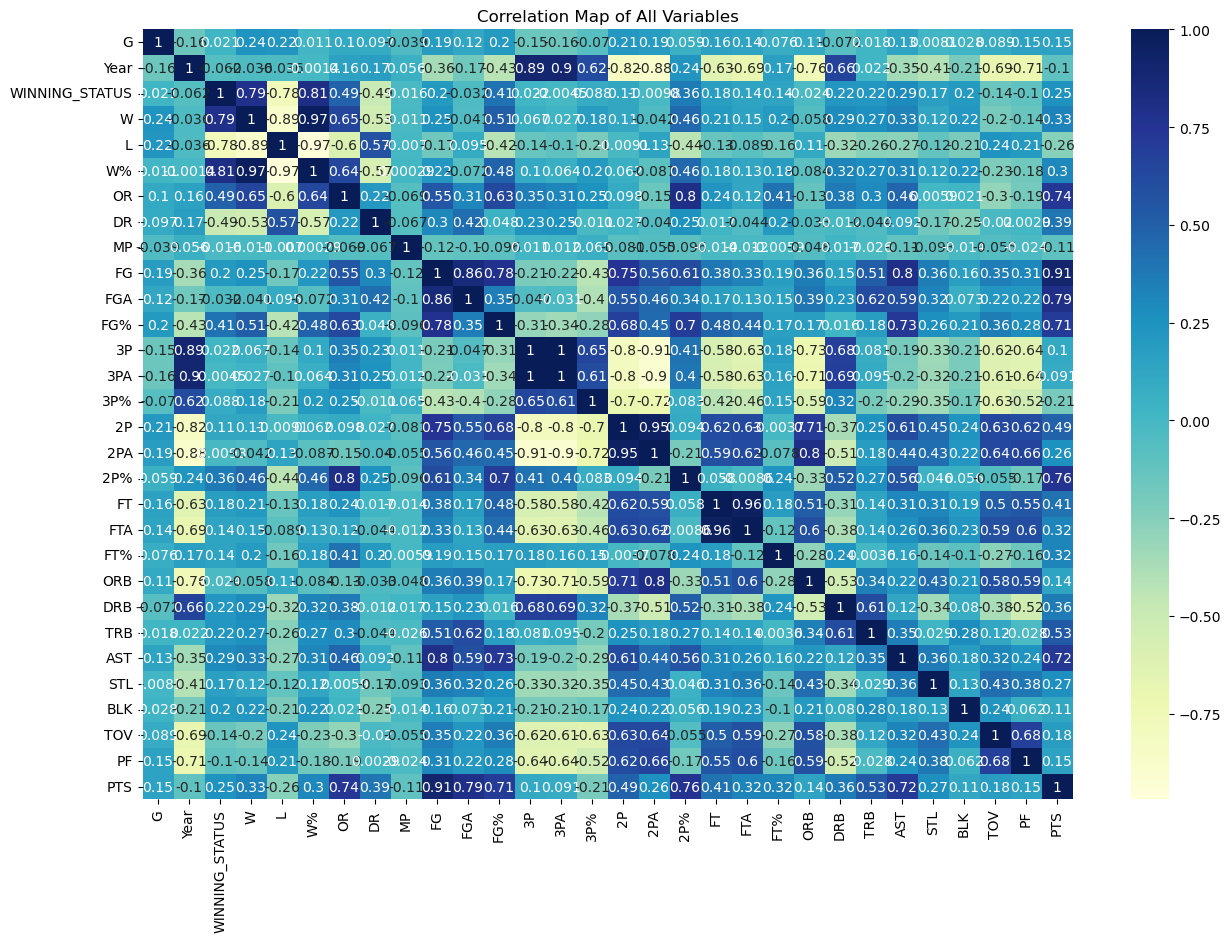

In [10]:
# correlation map of all the variables
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Map of All Variables")
plt.show()

As points per game are the most iconic and focused on metric, we will begin our inquiry with a preliminary investigation into that factor:
<h4><strong>Preliminary Investigation</strong></h4>

We first create a copy of our dataframe so that we can analyze its features without affecting the data that we have collected.

In [11]:
df_cp1 = df.copy()

After this, we set our dataframe to be indexed by the year. We do this so that when we create our plot, the average points per game will be plotted in relation to the year.

In [12]:
df_cp1.set_index("Year", inplace=True) 

We then group our dataframe by the team and plot the average points per game per year of every team into a line graph.

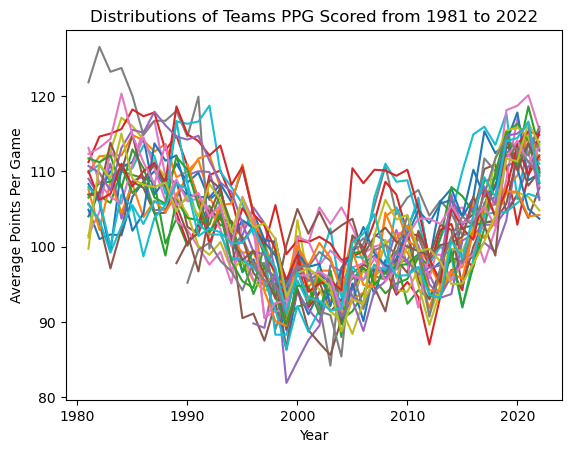

In [13]:
df_cp1.groupby("Team")["PTS"].plot(legend=False, xlabel= "Year", ylabel ="Average Points Per Game", 
                                                 title = "Distributions of Teams PPG Scored from 1981 to 2022");

This line graph
shows that the average points scored per game decreased from 1980-2000, but has recently been on the rise from 2000-2022. However, this does not give much insight into any particular team that has been excelling, which shows that we must observe more data to reach a more concrete hypothesis.

To make the graph more readable, we group the data by the year and take the total mean of all the team's points per game and graph into a single line.

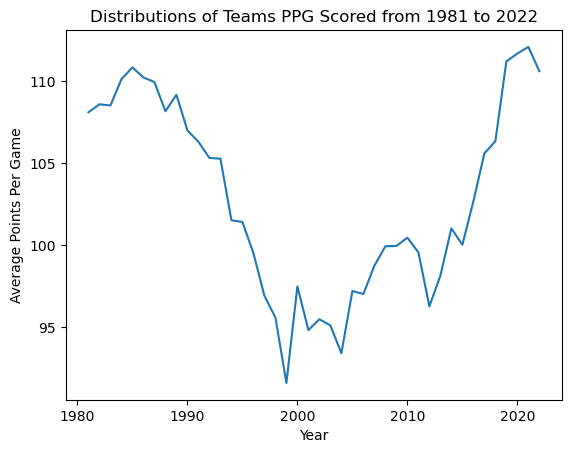

In [14]:
df_cp1.groupby("Year")["PTS"].mean().plot(legend=False, xlabel= "Year", ylabel ="Average Points Per Game", 
                                                 title = "Distributions of Teams PPG Scored from 1981 to 2022");

This graph clearly shows the decrease in the average points per game from 1980-2000, and the rise from 2000-2022.

We then create another copy of our dataframe and plot the average points per game of the champions by extracting teams that were marked as winning. This should give us some idea if the number of points scored per game is one way in which the NBA champion distinguished itself during the regular season and can possibly be a good metric in determing the NBA champ.

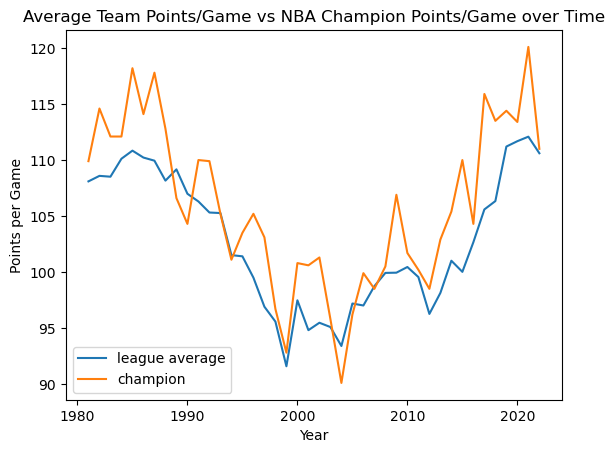

In [15]:
df_cp1 = df.copy()
championPointsDF = df_cp1.copy()
pointsAverages = championPointsDF.groupby("Year")["PTS"].mean()

newChampionPointsDF = championPointsDF.loc[championPointsDF["WINNING_STATUS"] == 2] 
newChampionPointsDF = newChampionPointsDF[["Year", "PTS"]]


plt.plot(pointsAverages.index.to_numpy(), pointsAverages.values, label = "league average")
plt.plot(newChampionPointsDF["Year"].to_numpy(), newChampionPointsDF["PTS"].to_numpy(), label = "champion")
plt.title("Average Team Points/Game vs NBA Champion Points/Game over Time")
plt.xlabel("Year")
plt.ylabel("Points per Game")
plt.legend()
plt.show()

This graph shows that the average points per game of the champions followed the same distribution as the rest of the league per year. However, the champions consistently had a higher points per game per year than the rest of the league average, suggesting that that is an important metric to keep track of. We can further see that it is an important distinguisher by performing a simple hypothesis test. 

<h4><strong>Hypothesis Test Explanation and Quick Application </strong></h4>

Hypothesis testing is a procedure performed in statistics to see whether or not a result is significant based on some initial assumption that we have. This initial assumption is known as the null hypothesis. In a hypothesis test, we calculate a certain statistical value (known as the test statistic) and then compare that to the value we expected it to have based on our null hypothesis. Just because it is different is not necessarily indicative that the null hypothesis is false, as naturally, it is possible to have some slight variations in the data that we have. Instead, based on the quantity we calculated and statistical tables, we can calculate a p-value that conveys the probability of obtaining a test statistic that is as contradictory to the null hypothesis value as the one that was obtained. If the p-value is low, then that means that there is enough ground to reject the null hypothesis and accepting the alternative hypothesis (what we test the null hypothesis against); otherwise, we fail to reject the null hypothesis. The value that we use as the threshold for the p-value to determine if it is low or high enough is called the significance level, and it is usually set to 0.05. Read this <a href = "https://www.sagepub.com/sites/default/files/upm-binaries/40007_Chapter8.pdf"> article </a> to get a more in-depth understanding of hypothesis testing. 

As for how we can apply a simple hypothesis test here, since the null hypothesis is what we accept by default and the alternative hypothesis is what we need evidence for, we will make our null hypothesis that the mean of the NBA's points per game is equal to the NBA champions' points per game. The alternative hypothesis that we are testing it against is that the mean of the NBA's points per game is less than the NBA champoins' points per game. Below, we use the scipy.tests library in order to test:

In [17]:
import scipy.stats

league_ppt_avg = pointsAverages.values
champion_ppt = newChampionPointsDF["PTS"].to_numpy()

t_stat, p_value = scipy.stats.ttest_ind(league_ppt_avg, champion_ppt, alternative = "less")

# print results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: -2.1784915858683145
p-value: 0.01612030662633339


As we can see, the p-value is less than 0.05, which means we can reject the null hypothesis and conveys that the fact that the NBA champions' points per game being greater (or in other words, the NBA's teams scoring less than the champion during the regular season) is statistically significant. Now that we have done that, let us investigate further into the nature of the points scored by each team in the league. 

<h4><strong> More Investigation into the nature of Points per Game </strong></h4>

Since 1980, there were a few moments in which the NBA added a few more teams to the league. As such, a possible hypothesis for this dip is that a higher number of teams decreases the points per game because it disperses the existing offensive talent over more teams, thus making the average team worse. To observe whether this is true, we will group and count the number of teams, and plot it against the year.

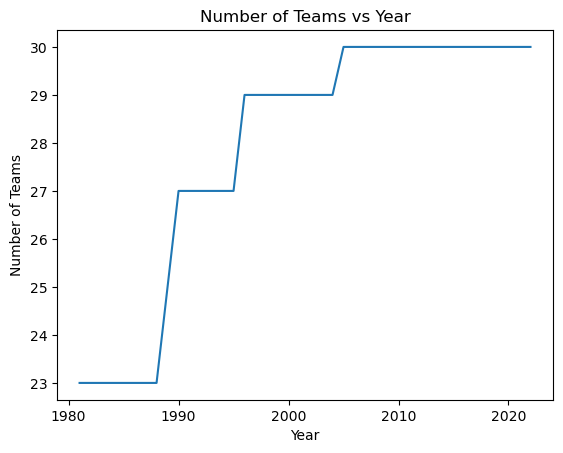

In [18]:
df_cp1.groupby("Year")["Team"].count().plot(xlabel = "Year", ylabel = "Number of Teams",
                                           title = "Number of Teams vs Year");

From this graph, we can easily see the spikes that have occurred in the number of teams in modern NBA history. Although there is some overlap between the increase in teams in 1988 and in the 90s and the decrease in points per game in the "Average Team Points/Game vs NBA Champion Points/Game over Time" graph, there are some notable discrepancies that suggest that the number of teams is not necessarily something that we have to consider when modeling later. For example, in the average points per game graph, the major decrease in scoring starts roughly around 1983 even though the number of teams did not increase in that decade until about 1988. Additionally, the 2000s has featured an explosion in NBA's scoring despite the addition of teams earlier on in the turn of the millienium. We can also see these things in the following graph, where we graphed the number of teams against the average number of points scored. 

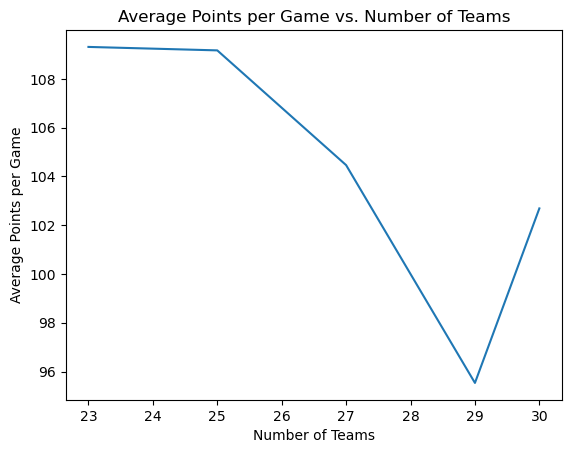

In [19]:
team_counts = df_cp1.groupby('Year')['Team'].nunique()
df_cp1['NumTeams'] = df_cp1['Year'].map(team_counts)
avg_points_per_team_num = df_cp1.groupby("NumTeams")["PTS"].mean()
df_cp1["NumTeamsPtsAvg"] = df_cp1["NumTeams"].map(avg_points_per_team_num)
plt.plot(df_cp1["NumTeams"].to_numpy(), df_cp1["NumTeamsPtsAvg"].to_numpy())
plt.xlabel("Number of Teams")
plt.ylabel("Average Points per Game")
plt.title("Average Points per Game vs. Number of Teams")
plt.show()


In the graph above, we can see that, even though there is some relationship between the number of teams that have been around and the average points per game, more recent times (past the 2000s especially), when there have been more teams than ever before, has very strongly challenged this notion, so we will not further explore this relationship. Let us explore some other metrics that influence the success of the NBA teams that have become champions. 

<h4><strong> Exploration into the influence of other metrics </strong></h4>

Below, we are making some violin plots in order to observe the ranges in values between the various teams in the league as well as the distribution of values over said range over the last many years in NBA history. Alongside these violin plots, we also have a graph of how each NBA champion performed in that respective category. The purpose behind this side-to-side comparison is to get an idea of whether NBA champions tended to be elite in particular categories over others. If the value of an NBA champ for a particular year corresponds to the upper half of the violin plot for that same very year, then we have a sense that the NBA champion of that year was particularly good in that department. First, we will take a look into the number of field goals made. 

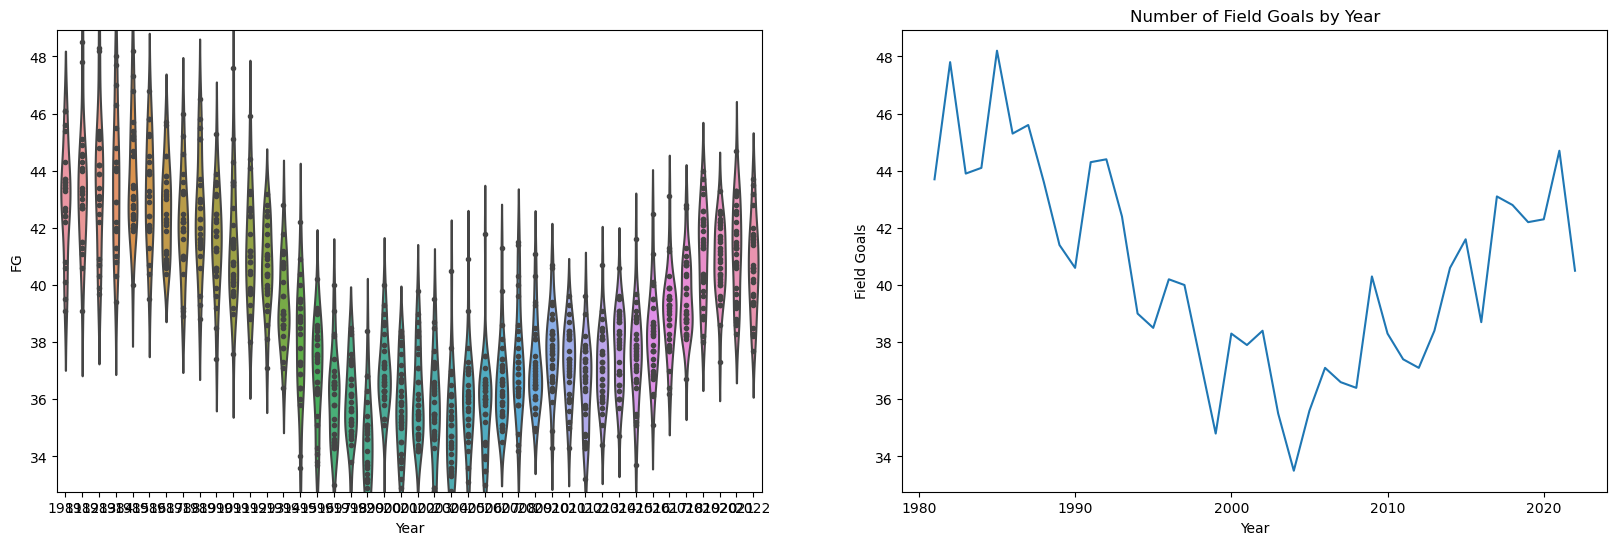

In [21]:
fgcompareDF = df.copy()
fgcompareChamp = fgcompareDF.loc[fgcompareDF["WINNING_STATUS"] == 2]
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20, 6))
sns.violinplot(x="Year", y="FG", data=fgcompareDF, inner="point", ax = ax1)

ax2.plot(fgcompareChamp["Year"].to_numpy(), fgcompareChamp["FG"].to_numpy())
ax2.set_title("Number of Field Goals by Year")
ax2.set_xlabel("Year")
ax2.set_ylabel("Field Goals")
ax1.set_ylim(ax2.get_ylim())
plt.show()

As can be seen in the plots above, the NBA champions often had field goal values that corresponded to the upper half of the violin plots, indicating that the NBA champ of a particular season tended to score a lot of field goals during its regular season games. Now, let us move on to the number of two point shots made. 

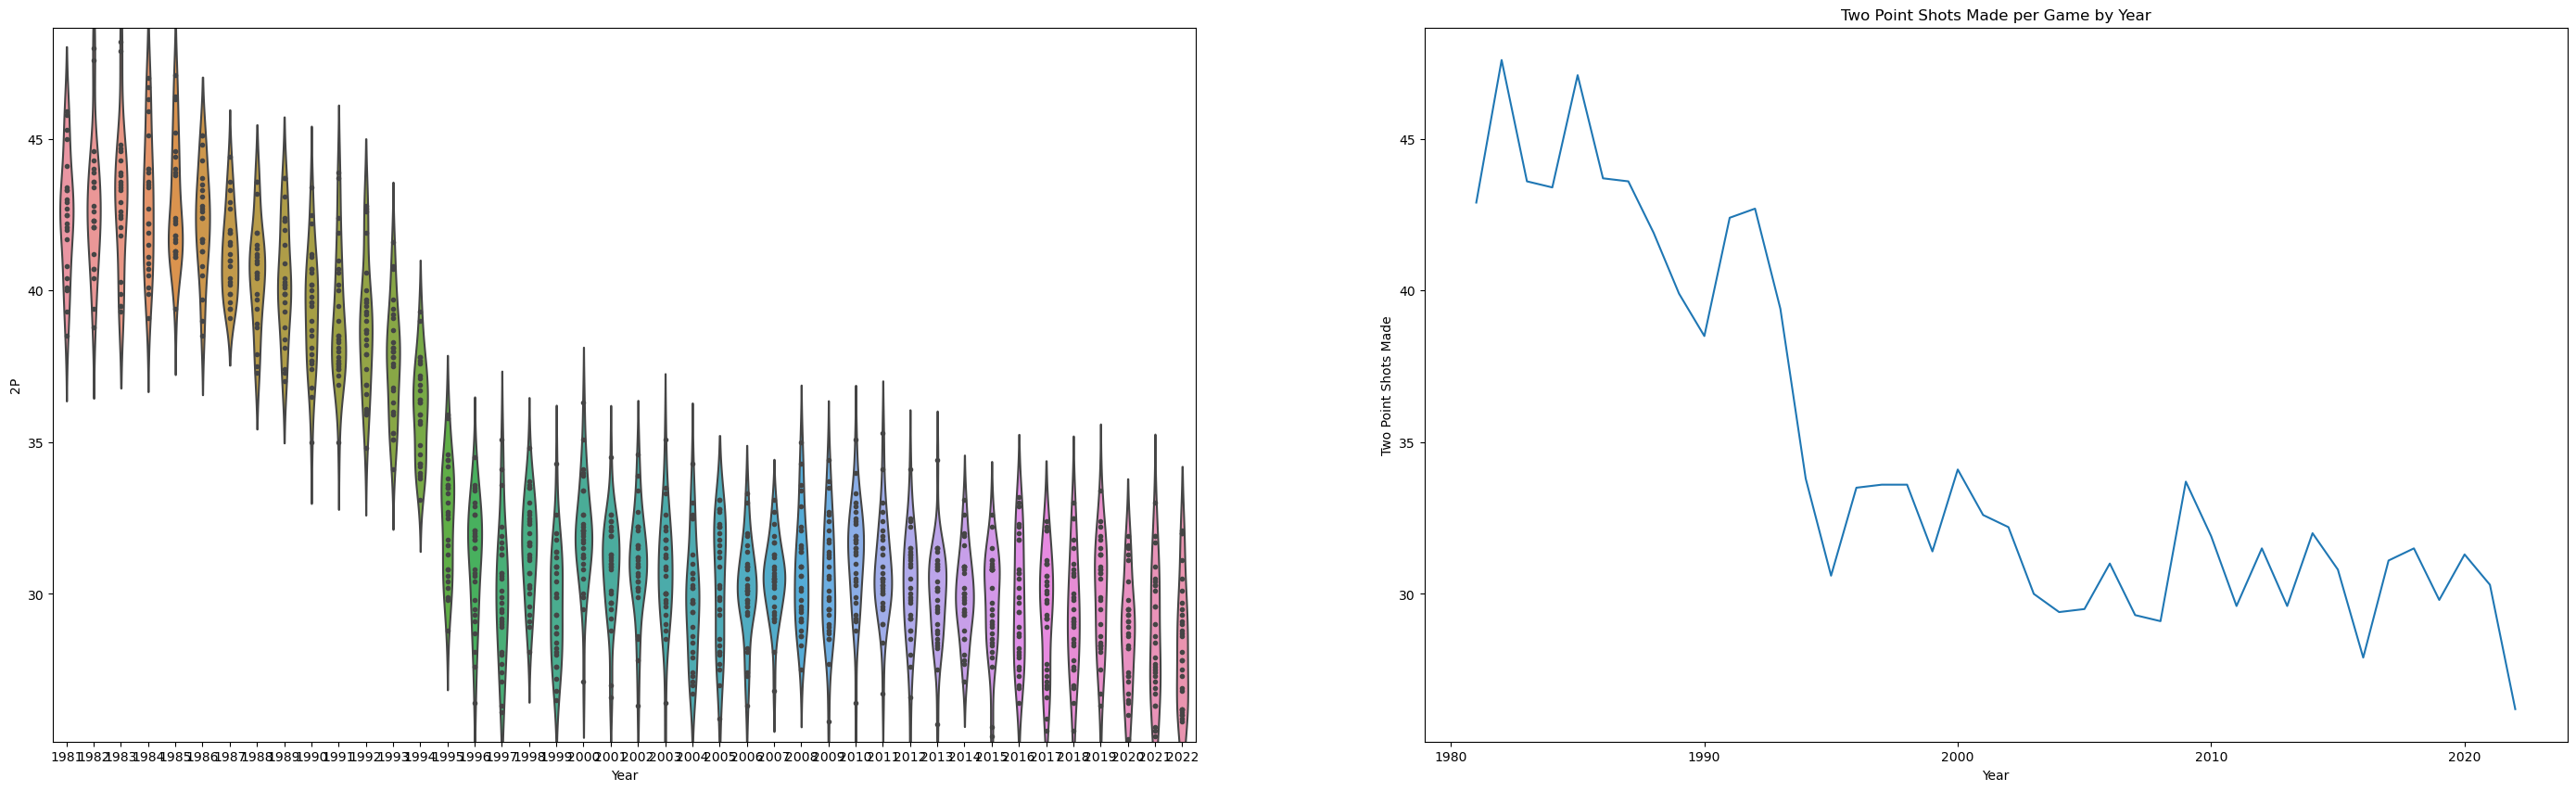

In [26]:
p2compareDF = df.copy()
p2compareChamp = fgcompareDF.loc[p2compareDF["WINNING_STATUS"] == 2]
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(35, 10))
sns.violinplot(x="Year", y="2P", data=p2compareDF, inner="point", ax = ax1)

ax2.plot(p2compareChamp["Year"].to_numpy(), p2compareChamp["2P"].to_numpy())
ax2.set_title("Two Point Shots Made per Game by Year")
ax2.set_xlabel("Year")
ax2.set_ylabel("Two Point Shots Made")
ax1.set_ylim(ax2.get_ylim())
plt.show()

Although there were some years in which it seems as though the NBA champion was not elite as far as two-point-shot-making goes, there are many years in which the NBA champion was elite, so in addition to points per game and number of field goals, number of two-point-shot-makes is also a vital metric to keep track of. We can also look into wins as well. 

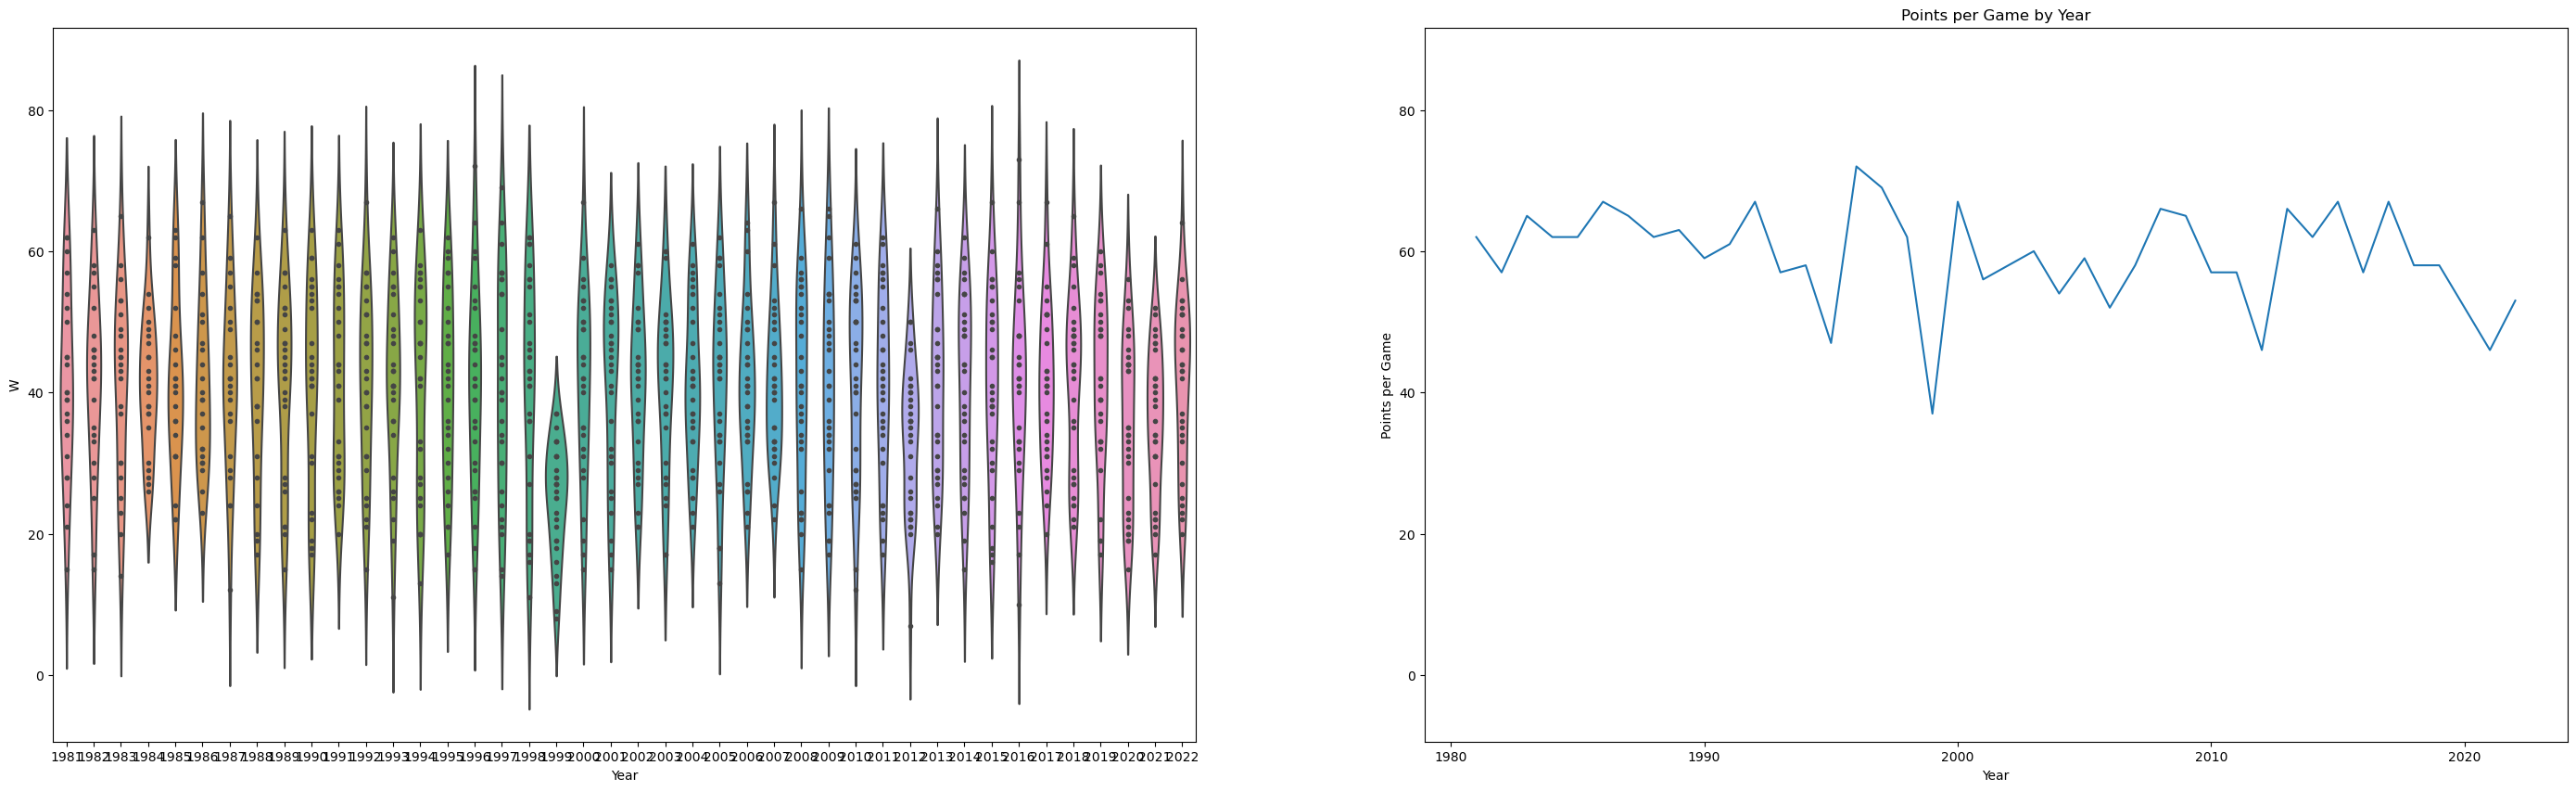

In [29]:
wcompareDF = df.copy()
wcompareChamp = fgcompareDF.loc[wcompareDF["WINNING_STATUS"] == 2]
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(35, 10))
sns.violinplot(x="Year", y="W", data=wcompareDF, inner="point", ax = ax1)

ax2.plot(wcompareChamp["Year"].to_numpy(), wcompareChamp["W"].to_numpy())
ax2.set_title("Points per Game by Year")
ax2.set_xlabel("Year")
ax2.set_ylabel("Points per Game")
ax2.set_ylim(ax1.get_ylim())
plt.show()

The number of regular seasons win appears to also be something that NBA champions were elite in. As a matter of fact, out of these violin plots, this is the category in which the NBA champions have most consistently performed well in. This makes sense because most of the NBA's champions had the highest or close to the highest win percentage. Now that we have already seen that points per game, field goals made, two point shots made, and wins/win percentage are key metrics, we can move our exploration into the relationship between regular season winning percentage and these other metrics -- if there is a strong connection between regular season winning percentage and some other metric, then that metric could be something we could consider in our model:

/tmp/ipykernel_73830/3123756699.py:8: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,6))


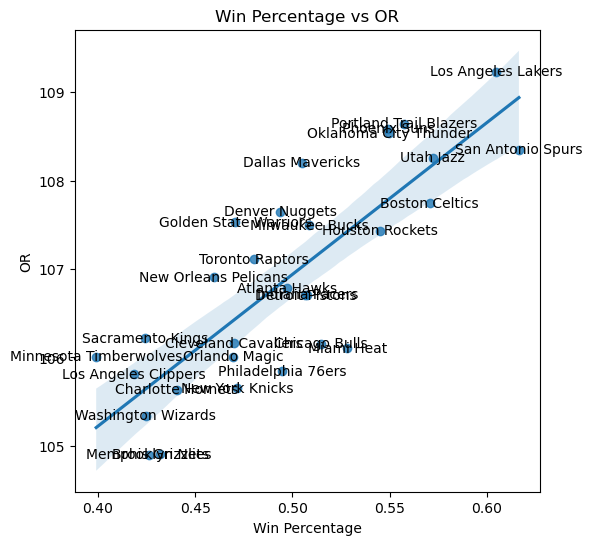

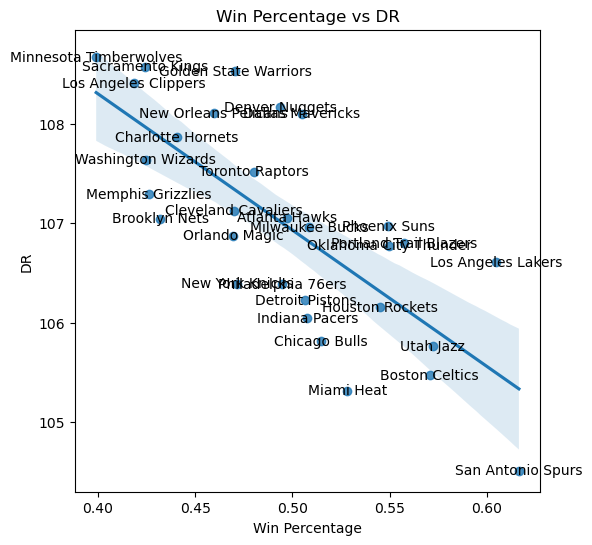

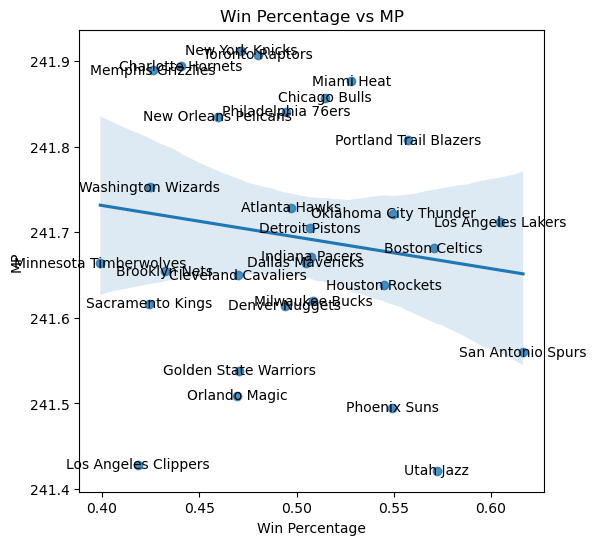

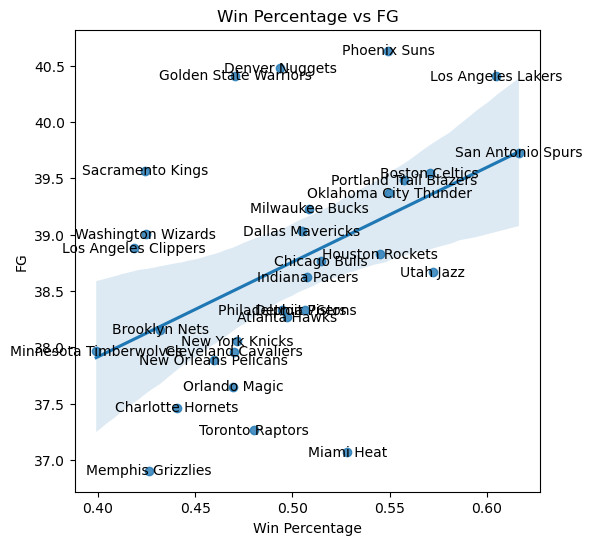

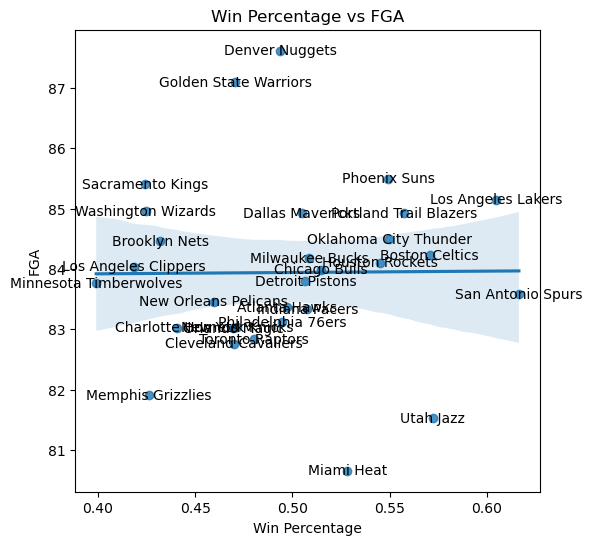

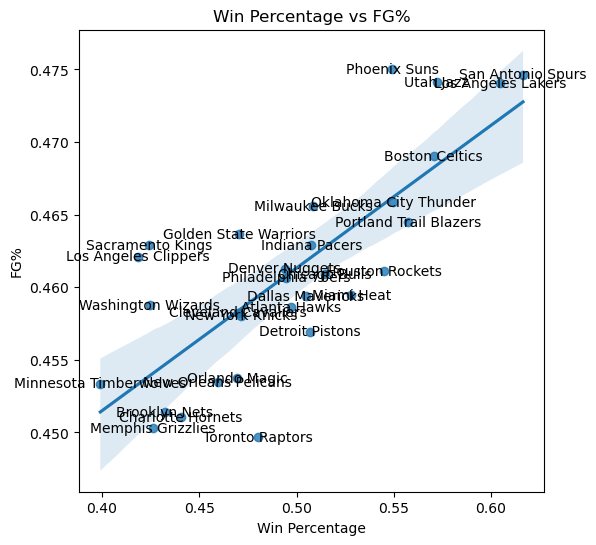

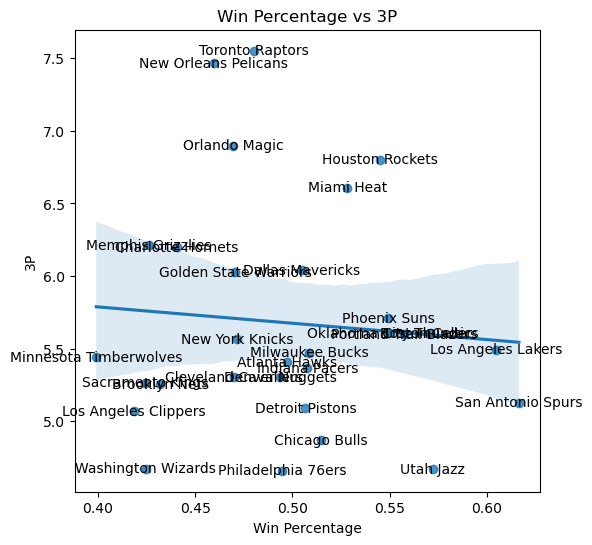

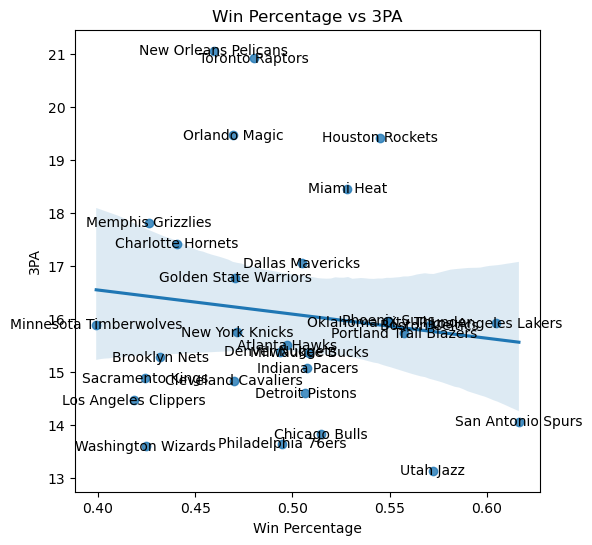

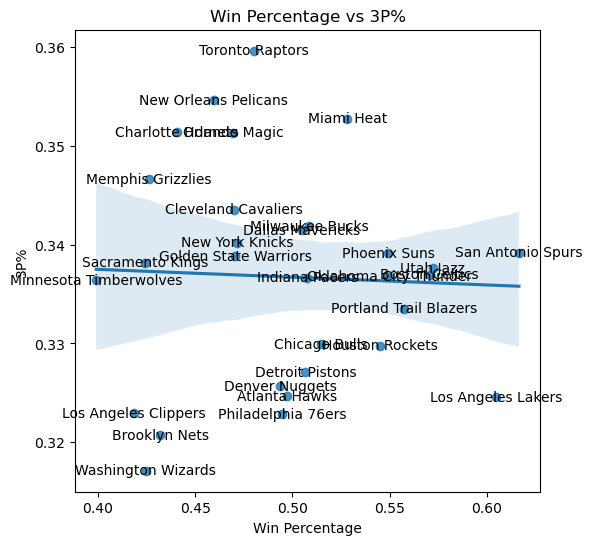

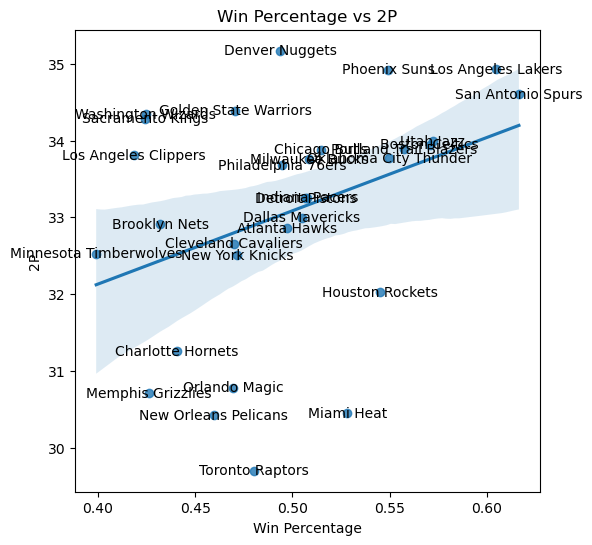

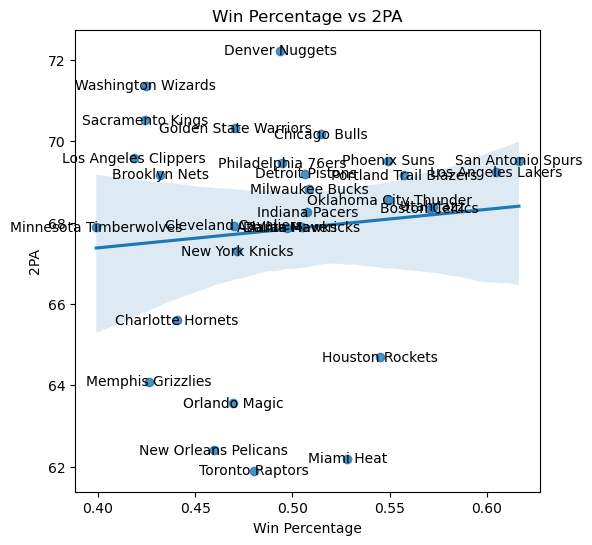

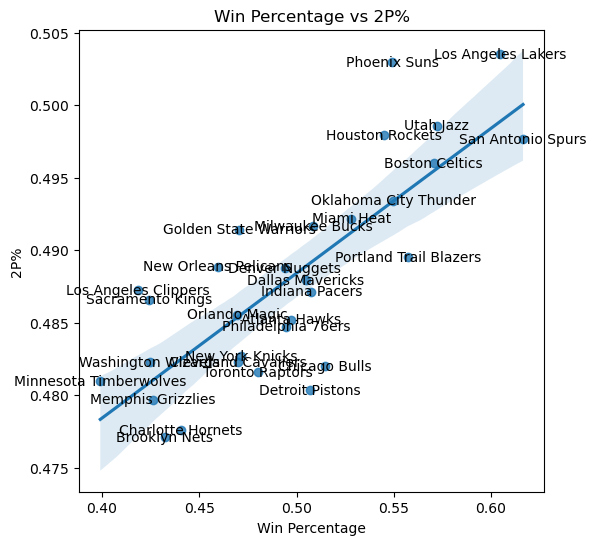

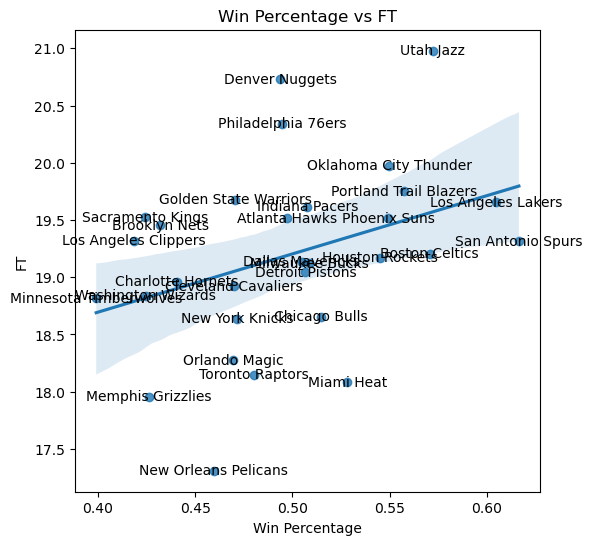

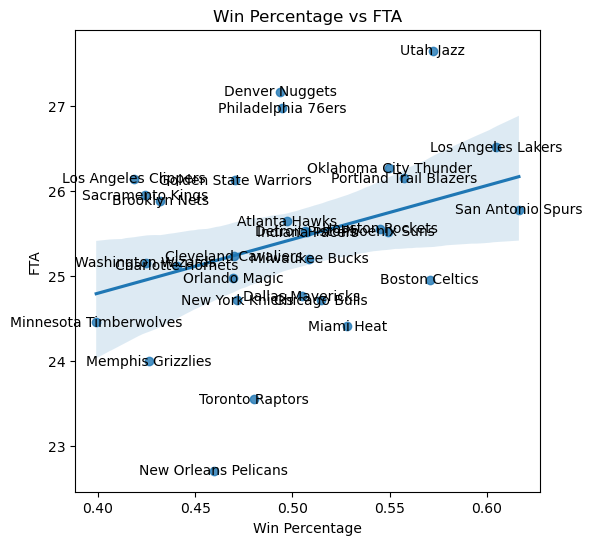

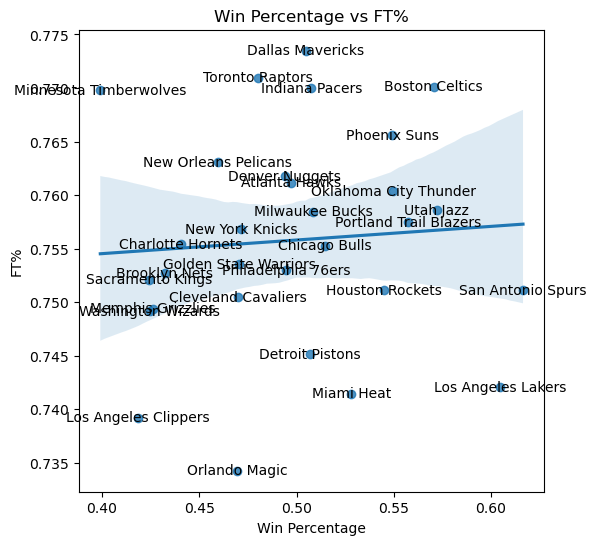

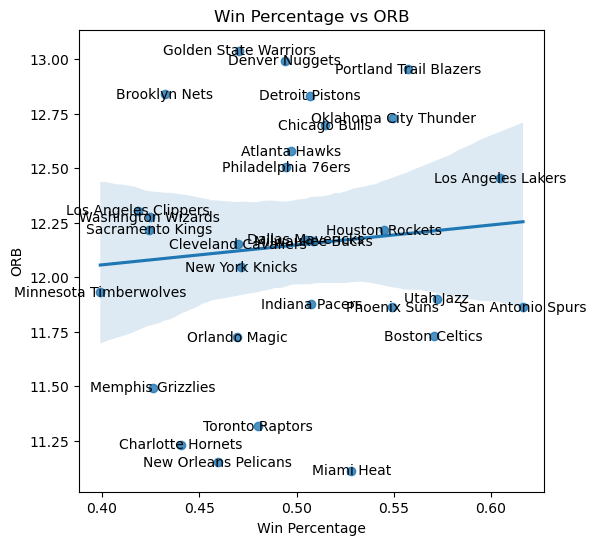

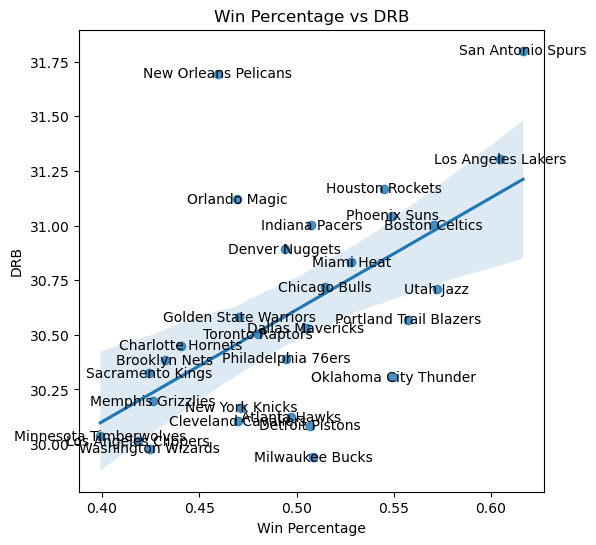

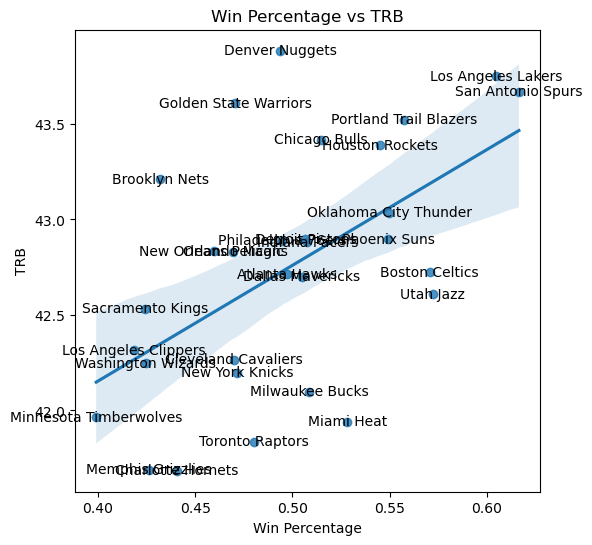

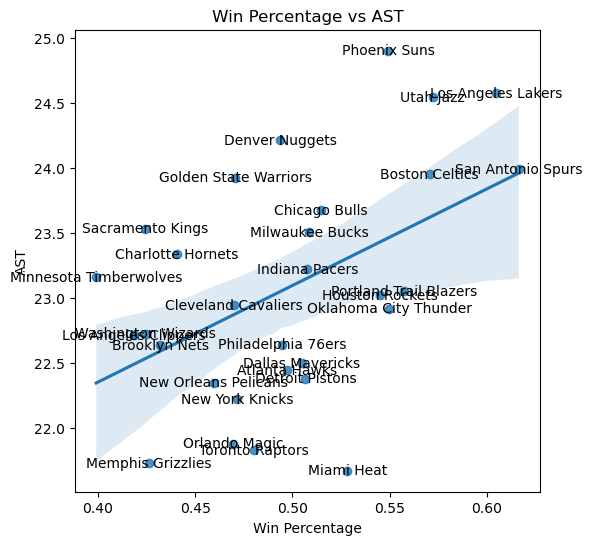

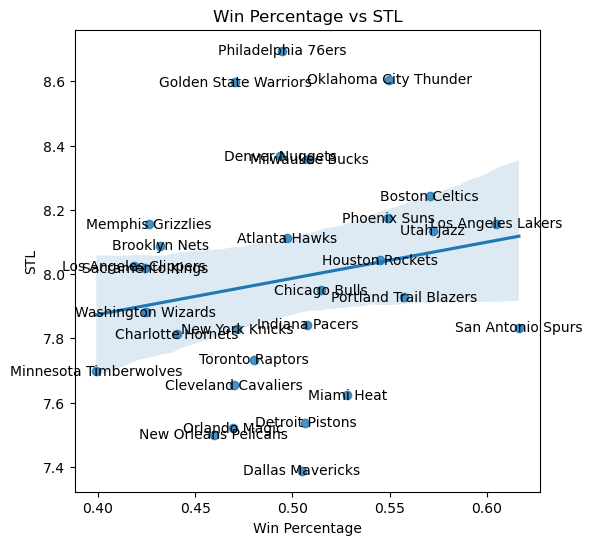

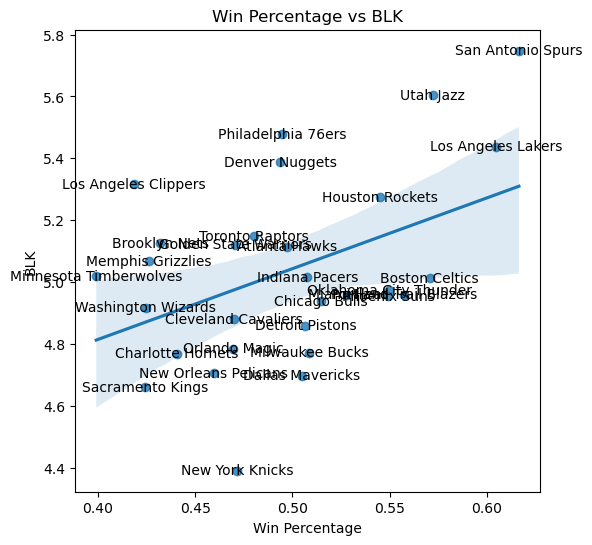

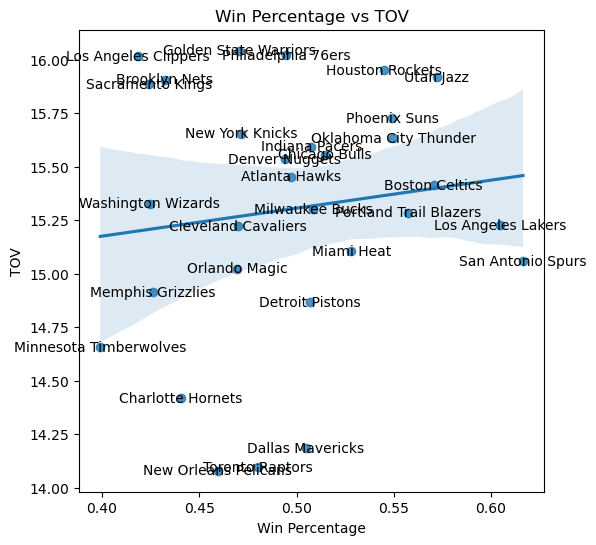

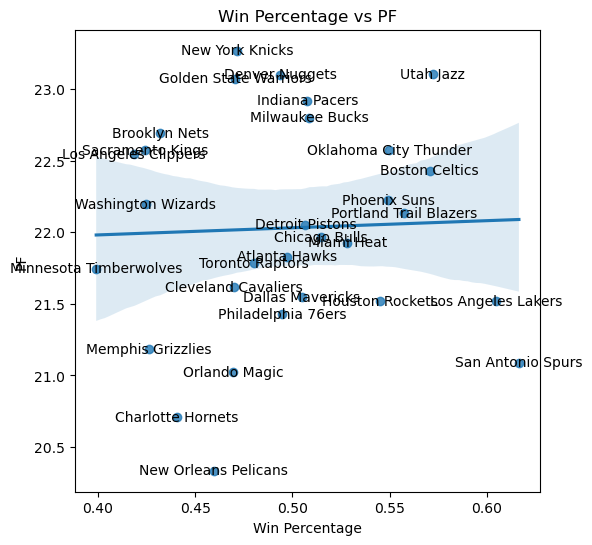

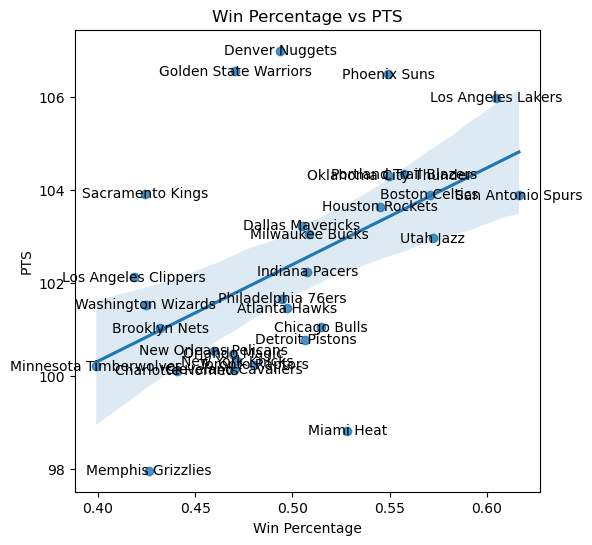

In [30]:
df_cp2 = df.copy()
for stat in df_cp2.loc[:, "OR":"PTS"]:
    df_cp2 = df.copy()
    winper = df_cp2.groupby("Team")["W%"].mean().reset_index()
    statdf = df_cp2.groupby("Team")[stat].mean().reset_index()

    df_cp2 = pd.merge(statdf, winper, how='left', on = 'Team')
    plt.figure(figsize=(6,6))
    sns.regplot(x='W%', y=stat, data=df_cp2)
    for x, y, label in zip(df_cp2["W%"], df_cp2[stat], df_cp2["Team"]):
        plt.text(x, y, label, ha='center', va='center')

    plt.title("Win Percentage vs " + stat)
    plt.xlabel("Win Percentage")
    plt.ylabel(stat)

These graphs reveal that some statistics such as FG, FG%, 2P, 2P%, FT, FTA, and OR have a high correlation with the regular season winning percentage. To confirm these metrics, we will observe if the same correlation exists within the season champions of each year 

We will then create a similar plot but instead plot both the league and champions' statistic vs win percentage. We use the pandas functon loc to filter out teams that are marked as winning the season, and obtain the mean of their win percentages and statistics into a different dataframe. We then plot both the entire league's win pecentage vs statistic and the champions' on the same plot to observe the difference between the two.

/tmp/ipykernel_73830/450008879.py:14: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(6,6)) #sets the graph size


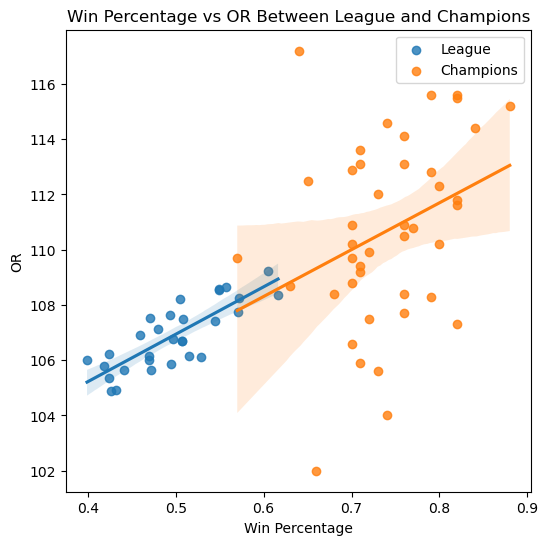

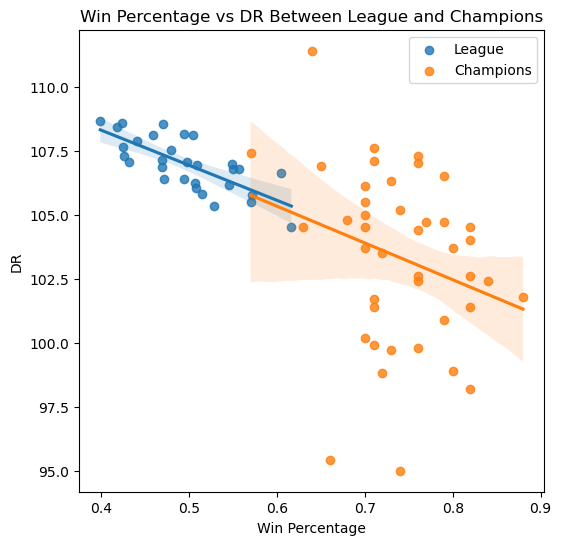

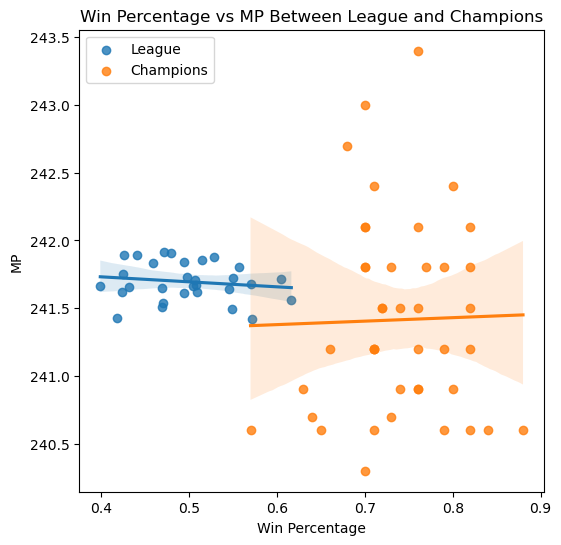

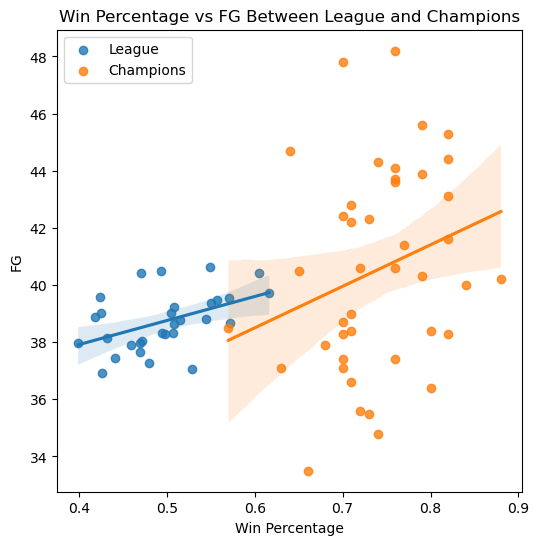

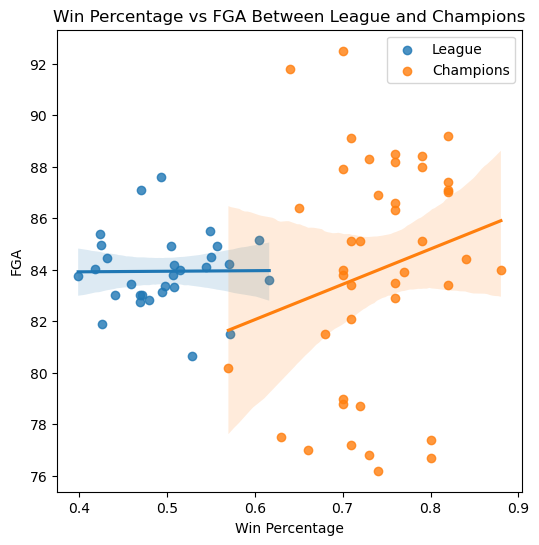

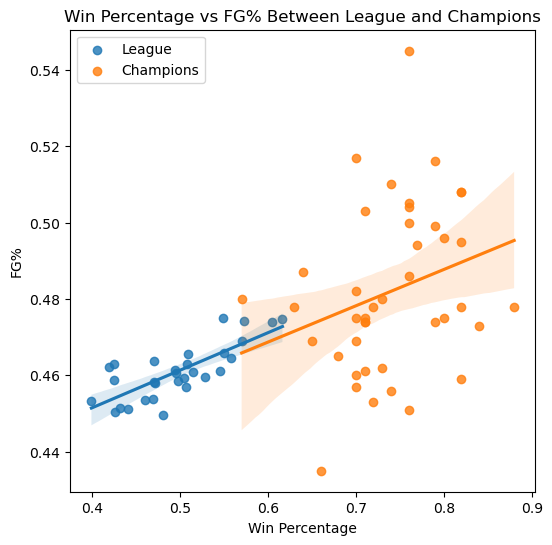

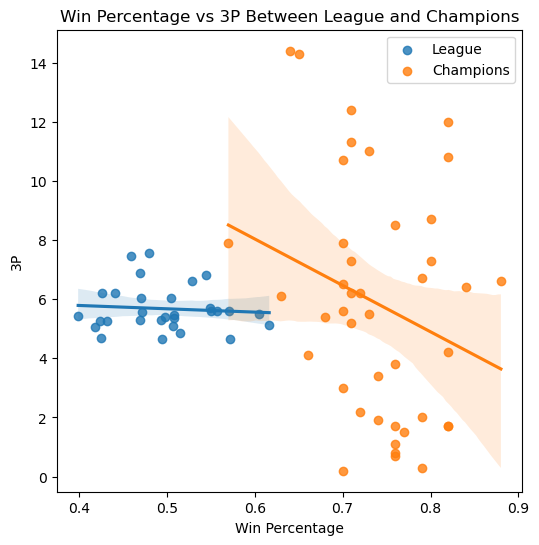

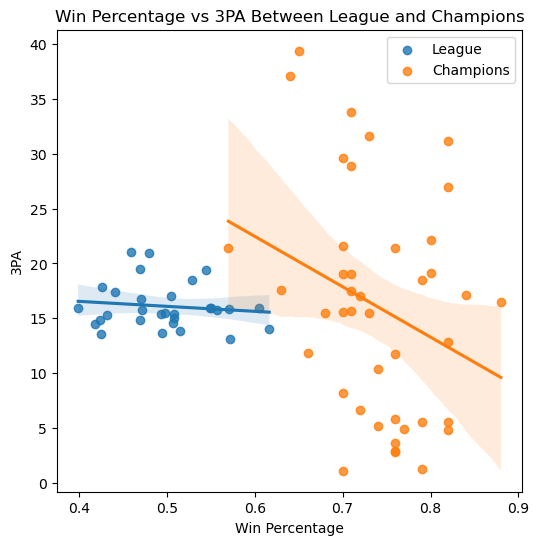

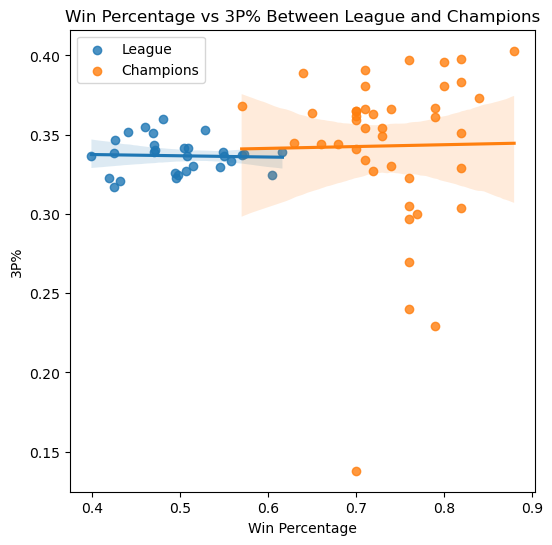

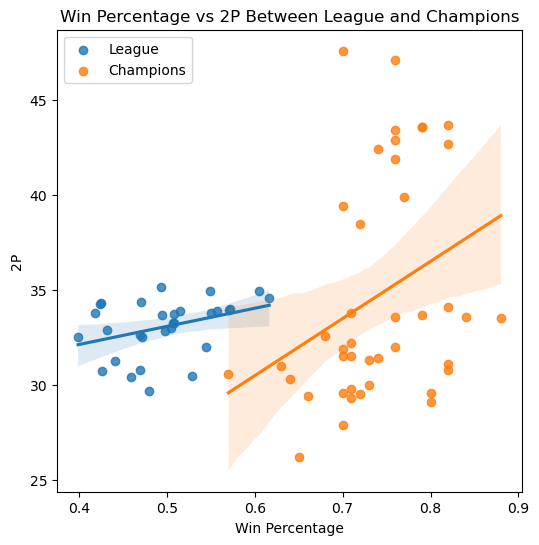

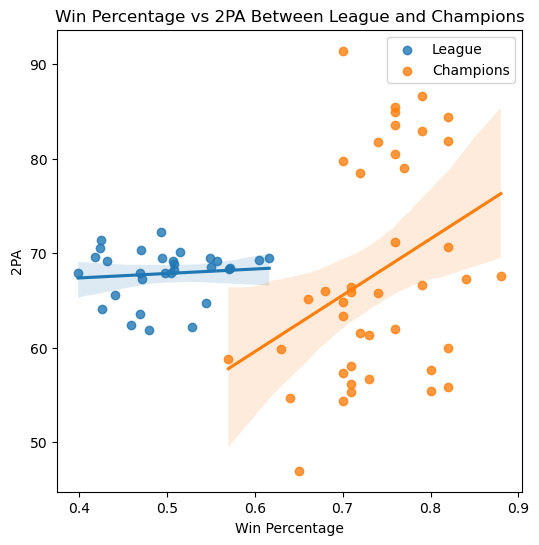

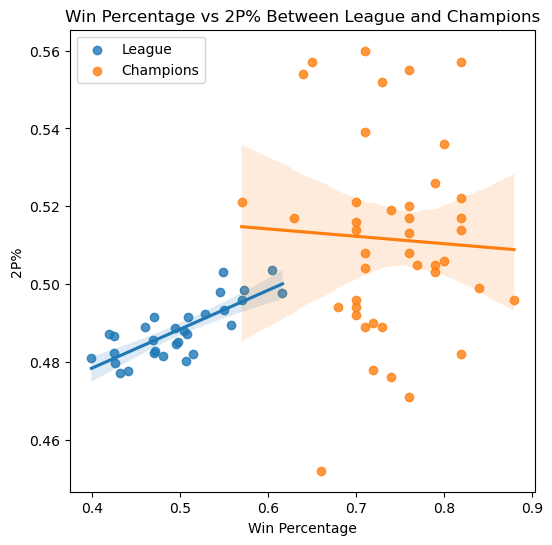

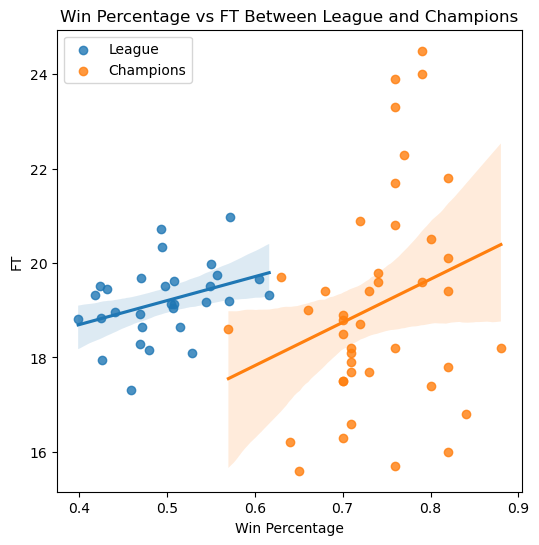

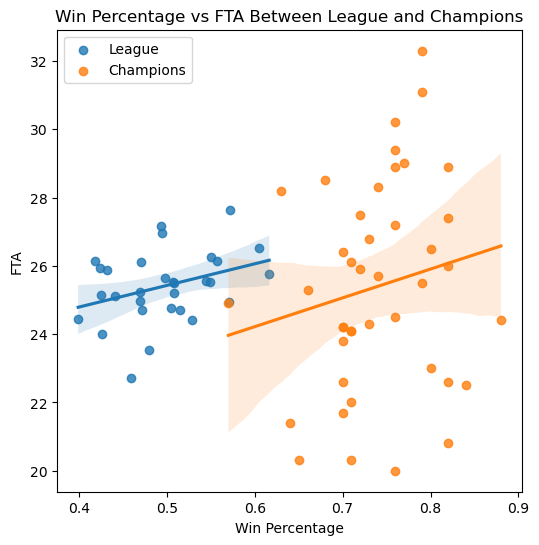

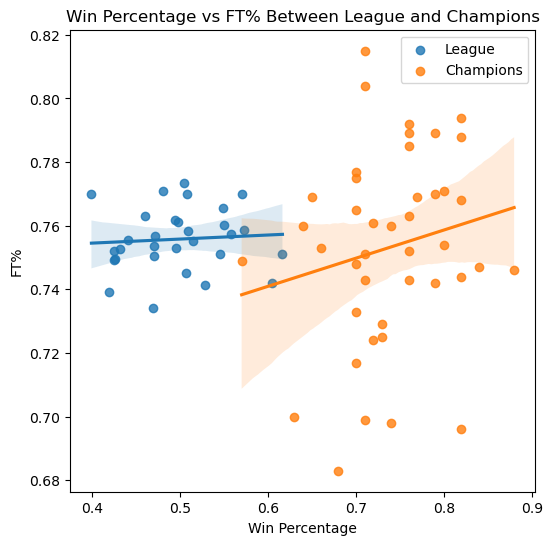

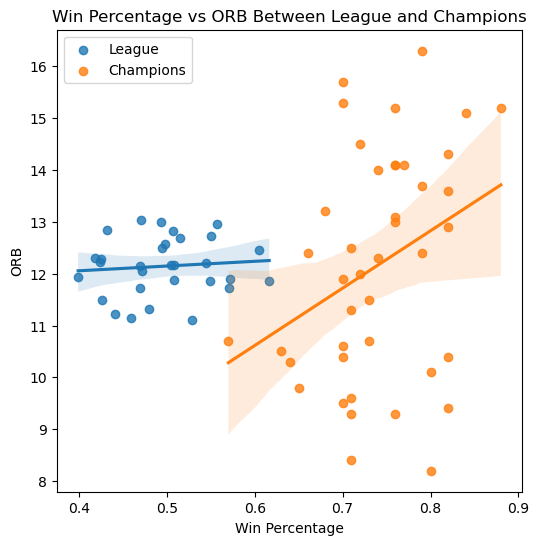

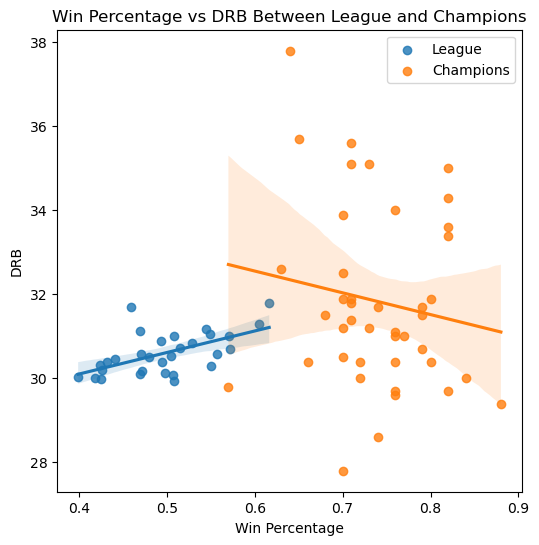

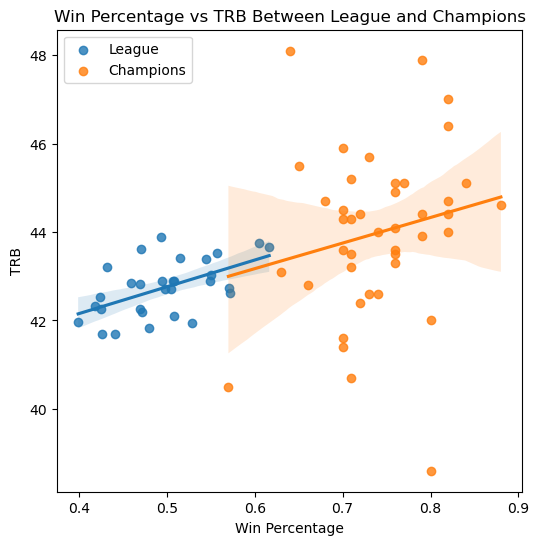

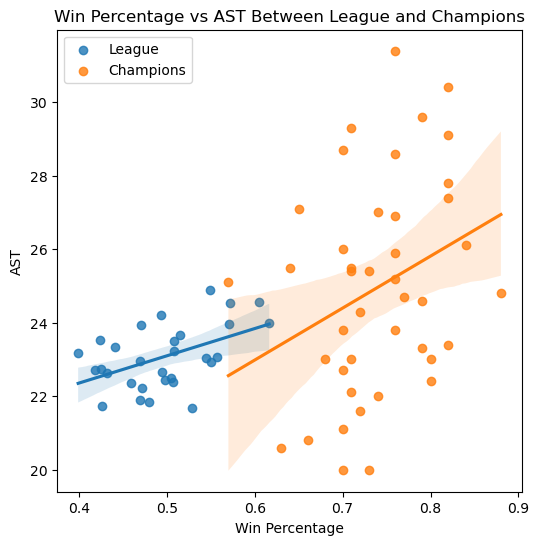

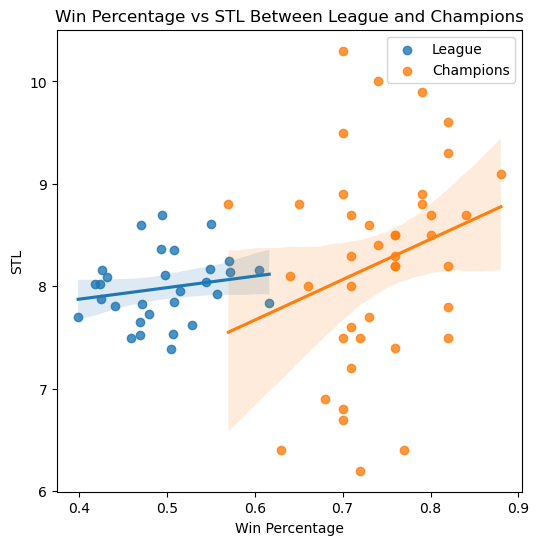

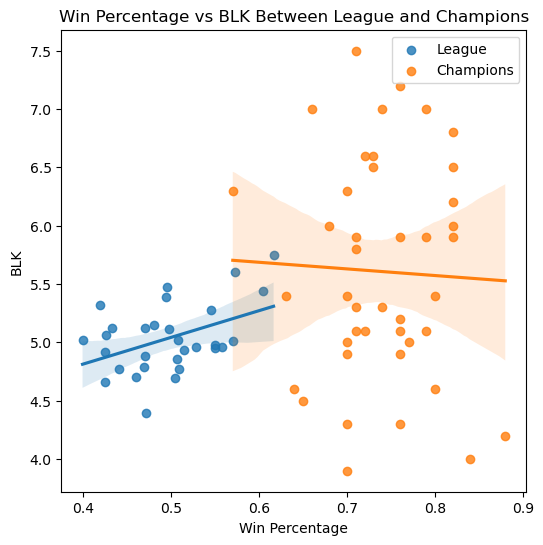

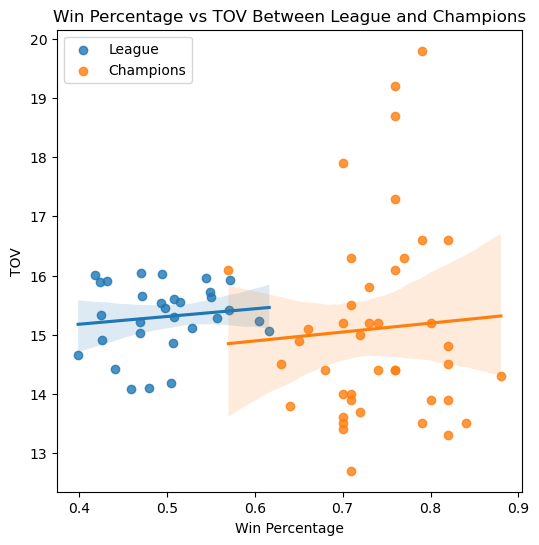

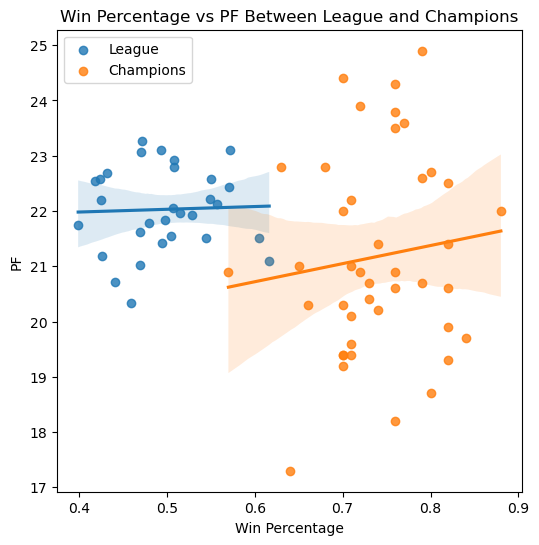

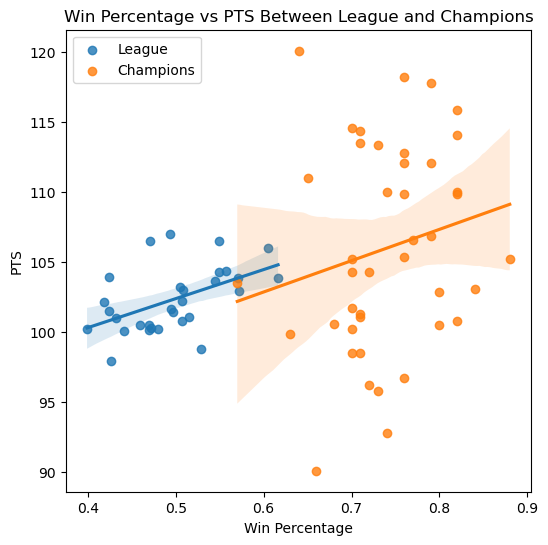

In [31]:
df_cp2 = df.copy()

#iterates through each statistic not including W/L and W%
for stat in df_cp2.loc[:, "OR":"PTS"]:
    df_cp2 = df.copy()
    winners = df_cp2.loc[df_cp2["WINNING_STATUS"]==2] #extracts the winners
    winper = df_cp2.groupby("Team")["W%"].mean().reset_index() #gets the mean of W% by team
    statdf = df_cp2.groupby("Team")[stat].mean().reset_index() #gets the mean of the stat by team

    winperchamp = winners.groupby("Team")["W%"].mean().reset_index() #gets the champions' mean of W% by team
    statchamp = winners.groupby("Team")[stat].mean().reset_index() #gets the champions' mean of the stat by team 

    df_cp2 = pd.merge(statdf, winper, how='left', on = 'Team') #merges the new dataframes created
    plt.figure(figsize=(6,6)) #sets the graph size
    sns.regplot(x='W%', y=stat, data=df_cp2, label = "League") #plots the league's win percentage vs the statistic 
    sns.regplot(x='W%', y=stat, data=winners, label = "Champions") #plots the champions' win percentage vs the statistic 

    #Sets plot title, legend, and x/y labels
    plt.title("Win Percentage vs " + stat + " Between League and Champions")
    plt.legend()
    plt.xlabel("Win Percentage")
    plt.ylabel(stat)

As seen in the graphs above, the champions have a higher average win percentage ranging from 0.6-0.9. Some of the statistics are also differently correlated between the league and the champions. For example, field goal attempts do not have much of a correlation in the league, but has a significant linear regression line amongst the champions. Other stats such as 2P also have a higher correlation amongst champions rather than the rest of the league. On the other hand, some stats have the oppoite effect, with defensive rebounds and 3P having a negative correlation among champions despite having a positive correlation amongst the rest of the league.

This shows us that some statistics are more correlated to the win percentage of the league champions than others, which influences which data we should use to input in our ML models. Statistics such as OR and TRB are consistently correlated with both the league and champions, but others differ between the two, and can lead to different prediction success/failure when inputted into our ML models.

<h2><strong>Machine Learning Modeling</strong></h2>

This is the fourth step of the data science lifecycle where we try to model our data to make a future prediction.

First we want to get the regular season data for the 2022-2023 regular season. This will allow us to develop a model to run on this data and determine which team will win the 2023 NBA Championship based on the regular season statistics and past trends.

We will begin by web scraping Basketball Reference for the 2023 per game and advanced statistics.

In [32]:
#Set the columns of the pandas dataframe
df_per_game_2023 = pd.DataFrame(columns=["Team", "G", "MP", "FG", "FGA", "FG%", "3P", "3PA", "3P%", "2P", "2PA", "2P%", "FT",
                          "FTA", "FT%", "ORB", "DRB", "TRB", "AST", "STL", "BLK", "TOV", "PF", "PTS", "Year", "WINNING_STATUS"])

df_advanced_2023 = pd.DataFrame(columns=["Team","Year","W", "L", "OR", "DR"])

In [33]:
#Gets URL for every requested year and retreives HTML
year = 2023
yearlyURL = 'https://www.basketball-reference.com/leagues/NBA_2023.html'
x = requests.get(yearlyURL, headers=headers)
soup = BeautifulSoup(x.text)
table = soup.find('table', id ='per_game-team')
table_advanced = soup.find('table', id ='advanced-team')

#scrape advanced stats for wins and losses
for row in table_advanced.tbody.findAll('tr'):
    columns = row.findAll('td')
    teamName = columns[0].text.strip()
    if (columns[0].text.strip()[-1] == "*"):
        teamName = teamName[:-1]

    columns = row.findAll('td')
    new_row = pd.Series({"Team":teamName, "Year": year, "W": float(columns[2].text.strip()), "L": float(columns[3].text.strip()), 
                            "OR": float(columns[9].text.strip()),"DR": float(columns[10].text.strip())})
    df_advanced_2023 = df_advanced_2023.append(new_row, ignore_index=True)

#scrap per game statistics for remaining statistics
for row in table.tbody.findAll('tr'):
    columns = row.findAll('td')
    
    #process whether the team made the playoffs/won the finals
    winningStatus = 0
    teamName = columns[0].text.strip()
    if (columns[0].text.strip()[-1] == "*"): 
        winningStatus = 1
        teamName = teamName[:-1]
    
    #develop new row for each team in the current season and append to Pandas df
    new_row = pd.Series({"Team": teamName, "G": float(columns[1].text.strip()), "MP": float(columns[2].text.strip()), "FG": float(columns[3].text.strip()), 
                "FGA": float(columns[4].text.strip()), "FG%": float(columns[5].text.strip()), "3P": float(columns[6].text.strip()), "3PA": float(columns[7].text.strip()),
                "3P%": float(columns[8].text.strip()), "2P": float(columns[9].text.strip()), "2PA": float(columns[10].text.strip()), "2P%": float(columns[11].text.strip()),
                "FT": float(columns[12].text.strip()), "FTA": float(columns[13].text.strip()), "FT%": float(columns[14].text.strip()), "ORB": float(columns[15].text.strip()),
                "DRB": float(columns[16].text.strip()), "TRB": float(columns[17].text.strip()), "AST": float(columns[18].text.strip()), "STL": float(columns[19].text.strip()),
                "BLK": float(columns[20].text.strip()), "TOV": float(columns[21].text.strip()), "PF": float(columns[22].text.strip()), "PTS": float(columns[23].text.strip()),
                "Year": year, "WINNING_STATUS": winningStatus})
    df_per_game_2023 = df_per_game_2023.append(new_row, ignore_index=True)

df_per_game_2023.loc[(df_per_game_2023["Team"] == soup.findAll("p")[2].find("a").text.strip()) & (df_per_game_2023["Year"] == year), "WINNING_STATUS"] = 2

Then we can merge the 2023 per game and advanced statistics into one Pandas df which will contain all of the features we have been using thus far.

In [34]:
df_2023 = pd.merge(df_per_game_2023, df_advanced_2023, on=['Team', 'Year'])
df_2023.Year = df_2023.Year.apply(pd.to_numeric)
df_2023.W = df_2023.W.apply(pd.to_numeric)
df_2023.L = df_2023.L.apply(pd.to_numeric)
df_2023['W%'] = round(df_2023['W']/df_2023['G'], 2)
df_2023

Team     G     MP    FG   FGA    FG%    3P   3PA    3P%  \
0         Sacramento Kings  82.0  241.8  43.6  88.2  0.494  13.8  37.3  0.369   
1    Golden State Warriors  82.0  241.8  43.1  90.2  0.479  16.6  43.2  0.385   
2            Atlanta Hawks  82.0  242.1  44.6  92.4  0.483  10.8  30.5  0.352   
3           Boston Celtics  82.0  243.7  42.2  88.8  0.475  16.0  42.6  0.377   
4    Oklahoma City Thunder  82.0  242.1  43.1  92.6  0.465  12.1  34.1  0.356   
5       Los Angeles Lakers  82.0  242.4  42.9  89.0  0.482  10.8  31.2  0.346   
6                Utah Jazz  82.0  241.5  42.5  89.8  0.473  13.3  37.8  0.353   
7        Memphis Grizzlies  82.0  241.2  43.7  92.1  0.475  12.0  34.2  0.351   
8          Milwaukee Bucks  82.0  241.8  42.7  90.4  0.473  14.8  40.3  0.368   
9           Indiana Pacers  82.0  240.9  42.0  89.6  0.469  13.6  37.0  0.367   
10         New York Knicks  82.0  243.4  42.0  89.4  0.470  12.6  35.7  0.354   
11          Denver Nuggets  82.0  240.9  43.6  86.4  0.504  11.8  31.2  0.379   
12  Minnesota Timberwolves  82.0  241.8  42.9  87.4  0.490  12.2  33.3  0.365   
13      Philadelphia 76ers  82.0  242.4  40.8  83.8  0.487  12.6  32.6  0.387   
14    New Orleans Pelicans  82.0  242.1  42.0  87.6  0.480  11.0  30.1  0.364   
15        Dallas Mavericks  82.0  243.0  40.0  84.3  0.475  15.2  41.0  0.371   
16            Phoenix Suns  82.0  241.2  42.1  90.1  0.467  12.2  32.6  0.374   
17    Los Angeles Clippers  82.0  241.8  41.1  86.1  0.477  12.7  33.4  0.381   
18  Portland Trail Blazers  82.0  240.6  40.5  85.4  0.474  12.9  35.3  0.365   
19           Brooklyn Nets  82.0  240.6  41.5  85.1  0.487  12.8  33.8  0.378   
20      Washington Wizards  82.0  240.9  42.1  86.9  0.485  11.3  31.7  0.356   
21           Chicago Bulls  82.0  242.7  42.5  86.8  0.490  10.4  28.9  0.361   
22       San Antonio Spurs  82.0  242.1  43.1  92.6  0.465  11.1  32.2  0.345   
23         Toronto Raptors  82.0  241.5  41.9  91.3  0.459  10.7  32.0  0.335   
24     Cleveland Cavaliers  82.0  242.4  41.6  85.2  0.488  11.6  31.6  0.367   
25           Orlando Magic  82.0  241.2  40.5  86.3  0.470  10.8  31.1  0.346   
26       Charlotte Hornets  82.0  241.8  41.3  90.4  0.457  10.7  32.5  0.330   
27         Houston Rockets  82.0  240.9  40.6  88.9  0.457  10.4  31.9  0.327   
28         Detroit Pistons  82.0  241.5  39.6  87.1  0.454  11.4  32.4  0.351   
29              Miami Heat  82.0  241.5  39.2  85.3  0.460  12.0  34.8  0.344   

      2P  ...   TOV    PF    PTS  Year  WINNING_STATUS     W     L     OR  \
0   29.8  ...  13.5  19.7  120.7  2023               1  48.0  34.0  119.4   
1   26.5  ...  16.3  21.4  118.9  2023               1  44.0  38.0  116.1   
2   33.9  ...  12.9  18.8  118.4  2023               1  41.0  41.0  116.6   
3   26.2  ...  13.4  18.8  117.9  2023               1  57.0  25.0  118.0   
4   31.0  ...  13.0  21.0  117.5  2023               1  40.0  42.0  115.2   
5   32.1  ...  14.1  17.9  117.2  2023               1  43.0  39.0  114.5   
6   29.2  ...  15.4  20.5  117.1  2023               0  37.0  45.0  115.8   
7   31.7  ...  13.6  20.0  116.9  2023               1  51.0  31.0  115.1   
8   27.9  ...  14.6  18.1  116.9  2023               1  58.0  24.0  115.4   
9   28.4  ...  14.9  21.2  116.3  2023               0  35.0  47.0  114.6   
10  29.4  ...  13.0  20.3  116.0  2023               1  47.0  35.0  117.8   
11  31.8  ...  14.5  18.6  115.8  2023               1  53.0  29.0  117.6   
12  30.7  ...  15.3  21.6  115.8  2023               1  42.0  40.0  113.7   
13  28.2  ...  13.7  20.4  115.2  2023               1  54.0  28.0  117.7   
14  31.1  ...  14.6  20.5  114.4  2023               1  42.0  40.0  114.4   
15  24.8  ...  12.2  20.7  114.2  2023               0  38.0  44.0  116.8   
16  29.9  ...  13.5  21.2  113.6  2023               1  45.0  37.0  115.1   
17  28.4  ...  14.2  19.5  113.6  2023               1  44.0  38.0  115.0   
18  27.6  ...  14.5  20.0  113.4  2023         

Some of these libraries were already loaded at the start of the tutorial, but we will reload them here to emphasize which libraries are meant specifically for our Machine Learning Models.

In [35]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

<h4><strong>First Model: Decision Tree</strong></h4>

<a href="https://scikit-learn.org/stable/modules/tree.html">Decision Trees</a> are a machine learning model that learns simple decision rules from our data features in order to create a model that can predict a target variable. We will start with this model because it is one of the more simpler models for a new data scientist to understand. 

The first thing we need to do is define our feature columns which are the statistics in the table that we want the model to use. We can start by using all of the features, but we will narrow them down based on which features are deemed redundant by the correlation matrix from earlier as well as trial error to see which features maximize the model accuracy.

Then, we will split our collected data into training and testing subsets. The goal here is to develop the model by having it learn from the training data and test the model by running it on the testing data and measuring its accuracy.

Finally, we can use the DecisionTreeClassifier() function from sklearn to create model using the training and testing subsets.

In [52]:
df_dec = df.copy()

#narrow down features to use for model
feature_cols = ["FG", "FGA", "3P", "3P%", "2P", "FT", "FTA", "FT%", "AST", "STL", "BLK", "PF", "PTS", "Year", "W", "L"]

#create subset of features from original dataframe and define target variable as WINNING STATUS
X = df_dec[feature_cols]
y = df.WINNING_STATUS

#split data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

#fit the model
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

#use predict() to determine accuracy
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8238636363636364


For a Decision Tree model the accuracy can vary every time you run the cell, but the average accuracy measurement hovers around the 0.84 mark. This is a strong accuracy number, so we can go ahead and try to predict the winner of the 2023 NBA Finals using this model.

In [53]:
#predict 2023 winner using 2023 dataframe
X_2023 = df_2023[feature_cols]
y_pred_2023 = clf.predict(X_2023)

# sort predictions in descending order and select the team with the highest prediction value
df_2023['WINNING_STATUS_clfpred'] = y_pred_2023
df_2023 = df_2023.sort_values(by=['WINNING_STATUS_clfpred'], ascending=False)

#pick the best and second best teams and print them
best_team = df_2023.iloc[0]['Team']
secondbest_team = df_2023.iloc[1]['Team']
print('The team with the HIGHEST predicted probability of winning the championship in 2023 is: ' + str(best_team))
print('The team with the second highest predicted probability is: ' + str(secondbest_team))

The team with the HIGHEST predicted probability of winning the championship in 2023 is: Boston Celtics
The team with the second highest predicted probability is: Milwaukee Bucks


As we can see, the team that this model picks to win the Finals is the Boston Celtics and the team with the second highest probability is the Milwaukee Bucks.

Now that we have the prediction we could stop here, but instead we will try to use more models in an attempt to increase the accuracy from 0.84.

<h4><strong>Second Model: Support Vector Machines (SVM)</strong></h4>

<a href="https://scikit-learn.org/stable/modules/svm.html#:~:text=Support%20vector%20machines%20(SVMs)%20are,Effective%20in%20high%20dimensional%20spaces">SVMs</a> are a set of machine learning methods used in classification which is helpful for our purposes. We want to classify each team as either winning the finals with a WINNING_STATUS = 2, or making the playoffs with a value of 1, or missing playoffs with a value of 0.

Similar to the previous model, we start by determining which features combine to create the highest accuracy value. Then we split the data into training and testing subsets and fit the model using the subsets.

In [54]:
from sklearn.svm import SVC

df_dec = df.copy()

#narrow down features
feature_cols = ["FG", "FG%", "3P", "3P%", "2P", "2P%", "FT",      "FTA", "FT%", "STL", "BLK", "PF", "PTS",    "W", "L"]
X = df_dec[feature_cols]
y = df.WINNING_STATUS

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

# SVM
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)
sscore = svm.score(X_test, y_test)
print("SVM Accuracy: ", sscore)

SVM Accuracy:  0.8693181818181818


We have improved our accuracy from ~0.84 to ~0.87 which is a significant improvement. Now let's try using this model to predict the 2023 NBA Finals winner.

In [55]:
X_2023 = df_2023[feature_cols]
y_pred_2023 = svm.predict(X_2023)
df_2023['WINNING_STATUS_svmpred'] = y_pred_2023

# Sort the dataframe by WINNING_STATUS_pred in descending order and select the first row
best_team = df_2023.sort_values(by='WINNING_STATUS_svmpred', ascending=False).iloc[0]['Team']
secondbest_team = df_2023.sort_values(by='WINNING_STATUS_svmpred', ascending=False).iloc[1]['Team']
print('The team with the HIGHEST predicted probability of winning the championship in 2023 is: ' + str(best_team))
print('The team with the second highest predicted probability is: ' + str(secondbest_team))

The team with the HIGHEST predicted probability of winning the championship in 2023 is: Boston Celtics
The team with the second highest predicted probability is: Philadelphia 76ers


The SVM model predicts the Boston Celtics to win the NBA Finals with the Philadelphia 76ers as having the second highest probability.

We will now try to use the K Nearest Neighbors (KNN) model and see if we can improve our accuracy any more.

<h4><strong>Third Model: K Nearest Neighbors (KNN)</strong></h4>

<a href="https://scikit-learn.org/stable/modules/neighbors.html#classification">KNN</a> is a machine learning model that stores instances of training data. It may be easier to think of instances as points on a graph and classification is done by doing a majority vote of the nearest neighbors of any query point on the graph to determine what the classification of the query point should be. The accuracy of the model can change based on the number of nearest neighbors being analyzed, so we will change this number to see what the highest possible accuracy will be for a specific value of k.

Just like the previous models, we will first narrow down the features to those that are relevant, and then split the data into training and testing subsets to be used when fitting the model.

In [56]:
from sklearn.neighbors import KNeighborsClassifier

df_dec = df.copy()

#narrow features
feature_cols = ["FG", "FGA", "FG%", "3P", "3P%", "2P", "2P%", "FT",      "FTA", "FT%", "AST", "STL", "BLK", "TOV", "PF", "PTS", "Year", "W", "L", "OR", "DR"]
X = df_dec[feature_cols]
y = df.WINNING_STATUS

#split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

#fit KNN model
kfin = 0
kscore = 0

#determine accuracy level for varying numbers of nearest neighbors
for k in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > kscore:
        kfin = k
        kscore = score
    print("K Nearest Neighbors Accuracy for k = ", k, ": ", score)

K Nearest Neighbors Accuracy for k =  1 :  0.8125
K Nearest Neighbors Accuracy for k =  2 :  0.8295454545454546
K Nearest Neighbors Accuracy for k =  3 :  0.8323863636363636
K Nearest Neighbors Accuracy for k =  4 :  0.8494318181818182
K Nearest Neighbors Accuracy for k =  5 :  0.8636363636363636
K Nearest Neighbors Accuracy for k =  6 :  0.8607954545454546
K Nearest Neighbors Accuracy for k =  7 :  0.875
K Nearest Neighbors Accuracy for k =  8 :  0.8664772727272727
K Nearest Neighbors Accuracy for k =  9 :  0.8693181818181818
K Nearest Neighbors Accuracy for k =  10 :  0.8607954545454546
K Nearest Neighbors Accuracy for k =  11 :  0.8607954545454546
K Nearest Neighbors Accuracy for k =  12 :  0.8721590909090909
K Nearest Neighbors Accuracy for k =  13 :  0.8693181818181818
K Nearest Neighbors Accuracy for k =  14 :  0.8721590909090909
K Nearest Neighbors Accuracy for k =  15 :  0.8636363636363636
K Nearest Neighbors Accuracy for k =  16 :  0.8693181818181818
K Nearest Neighbors Accura

The output above shows that the highest accuracy for this model is achieved with a k value of 7 and 18, both of which have an accuracy of 0.875. This is an improvement over the previous two models, so we can go ahead and try to use this model to predict the 2023 NBA Finals winner.

In [57]:
X_2023 = df_2023[feature_cols]
y_pred_proba_2023 = knn.predict_proba(X_2023)

# Get indices of teams in descending order of predicted probability for class 2 (Championship)
team_indices = np.argsort(y_pred_proba_2023[:, 2])[::-1]

# Select top two teams
top_teams = df_2023.iloc[team_indices[:2]]['Team'].tolist()

# Set winning status map
winning_status_map = {0: 'Lose', 1: 'Win', 2: 'Championship'}


# Print the two teams with the highest probability to win the championship
print('The team with the HIGHEST predicted probability of winning the championship in 2023 is: ' + str(top_teams[0]))
print('The team with the second highest predicted probability is: ' + str(top_teams[1]))

The team with the HIGHEST predicted probability of winning the championship in 2023 is: Boston Celtics
The team with the second highest predicted probability is: Milwaukee Bucks


The KNN model has predicted the Boston Celtics to win the 2023 NBA Finals with the Milwaukee Bucks having the second highest probability of winning.

The last sklearn model we will use is logistic regression to see if we can increase the accuracy any more.

<h4><strong>Fourth Model: Logistic Regression</strong></h4>

<a href="https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression">Logistic Regression</a> is a machine learning model that is used as a classification model. We will try to use it to classify whether an NBA team will win the finals by developing a logistic regression model. This model can do binary or one vs rest predictions and we will do one vs rest because we want to predict whether a team will have a WINNING_STATUS of 2 or 0/1.

We start by narrowing down the features to those that maximize the accuracy and then split data to fit the model.

In [58]:
df_dec = df.copy()

feature_cols = ["FG", "3P", "2P", "FT%", "AST", "STL", "W", "L"]

X = df_dec[feature_cols]
y = df.WINNING_STATUS

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=5000)
log_reg.fit(X_train, y_train)
lscore = log_reg.score(X_test, y_test)
print("Logistic Regression Accuracy: ", lscore)

Logistic Regression Accuracy:  0.9034090909090909


The measured accuracy is 0.90 which is the highest one yet! Let's try to use this model to predict the 2023 NBA Finals winner.

In [59]:
X_2023 = df_2023[feature_cols]
y_pred_2023 = log_reg.predict(X_2023)
df_2023['WINNING_STATUS_logpred'] = y_pred_2023

# Sort DataFrame by 'WINNING_STATUS_pred' column in descending order
df_2023 = df_2023.sort_values('WINNING_STATUS_logpred', ascending=False)

# Select the first row (highest 'WINNING_STATUS_pred')
best_team = df_2023.iloc[0]['Team']
secondbest_team = df_2023.iloc[1]['Team']
print('The team with the HIGHEST predicted probability of winning the championship in 2023 is: ' + str(best_team))
print('The team with the second highest predicted probability is: ' + str(secondbest_team))

The team with the HIGHEST predicted probability of winning the championship in 2023 is: Boston Celtics
The team with the second highest predicted probability is: Philadelphia 76ers


The Logistic Regression model picks the Boston Celtics to win the NBA Finals and deems the Philadelphia 76ers as the second highest probability to win.

We have now gone over 4 different sklearn models, so now we will try to create our own model which is a neural network to see if we can predict the NBA Finals winner.

<h4><strong>Fifth Model: CUSTOM Neural Network!</strong></h4>

The below code is a custom neural network used that takes in input for the given columns, and outputs a probability of a team to get a winning status of 0,1, and 2. We start off by standardizing the input, which helps increase accuracy. From there, we split the data up into training, testing, and validating data. The training is used to train, testing used to test, and validating to validate during the training process. Our layer structure is arbitrary, and can be considered a hyperparameter. We messed with a couple of options, and this produced the highest accuracy. We then compile the model with the binary cross entropy as the loss function, and the adam optimizer. After training the model, we pass in the 2023 data to get an output and prediction on who will win the championship this year.

In [62]:
#imports
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.utils import to_categorical

# copy dataframe
df_dec = df.copy()

# categories for neural network
x = df_dec[["FG", "FGA", "FG%", "3P", "3P%", "2P", "2P%", "FT",
      "FTA", "FT%", "AST", "STL", "BLK", "TOV", "PF", "PTS", "Year",
     "W", "L", "OR", "DR"]]
y = df_dec.WINNING_STATUS

# One-hot encode the labels
y = to_categorical(y, num_classes=3)

# Normalize the input data to ensure better performance
scaler = StandardScaler()
x = scaler.fit_transform(x)

#
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Define the model architecture uses softmax to return probability for the winning status to be 0,1, and 2. They all should add up to 1.
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model for 200 epochs
model.fit(x_train, y_train, epochs=200, batch_size=32, validation_data=(x_val, y_val))

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

Epoch 1/200
24/24 [==============================] - 2s 16ms/step - loss: 0.6803 - accuracy: 0.4820 - val_loss: 0.6229 - val_accuracy: 0.7074
Epoch 2/200
24/24 [==============================] - 0s 6ms/step - loss: 0.5832 - accuracy: 0.6555 - val_loss: 0.5056 - val_accuracy: 0.7872
Epoch 3/200
24/24 [==============================] - 0s 5ms/step - loss: 0.4718 - accuracy: 0.7797 - val_loss: 0.4089 - val_accuracy: 0.7979
Epoch 4/200
24/24 [==============================] - 0s 5ms/step - loss: 0.3747 - accuracy: 0.8117 - val_loss: 0.3422 - val_accuracy: 0.8298
Epoch 5/200
24/24 [==============================] - 0s 5ms/step - loss: 0.2947 - accuracy: 0.8678 - val_loss: 0.3091 - val_accuracy: 0.8404
Epoch 6/200
24/24 [==============================] - 0s 5ms/step - loss: 0.2470 - accuracy: 0.8812 - val_loss: 0.3012 - val_accuracy: 0.8404
Epoch 7/200
24/24 [==============================] - 0s 5ms/step - loss: 0.2481 - accuracy: 0.8758 - val_loss: 0.2881 - val_accuracy: 0.8670
Epoch 8/200


In [68]:
# Make predictions on 2023 data
X_2023 = df_2023[["FG", "FGA", "FG%", "3P", "3P%", "2P", "2P%", "FT",
      "FTA", "FT%", "AST", "STL", "BLK", "TOV", "PF", "PTS", "Year",
     "W", "L", "OR", "DR"]]
scaler = StandardScaler()
y_pred_2023 = model.predict(scaler.fit_transform(X_2023))

# Add the predicted winning status probabilities to the dataframe
df_2023['WINNING_STATUS_prob_0'] = y_pred_2023[:, 0]
df_2023['WINNING_STATUS_prob_1'] = y_pred_2023[:, 1]
df_2023['WINNING_STATUS_prob_2'] = y_pred_2023[:, 2]

# Sort the teams by predicted winning status probability in descending order for each category
df_2023 = df_2023.sort_values(by=['WINNING_STATUS_prob_2'], ascending=False)

best_team = df_2023.iloc[0]["Team"]
secondbest_team = df_2023.iloc[1]["Team"]
print('The team with the HIGHEST predicted probability of winning the championship in 2023 is: ' + str(best_team))
print('The team with the second highest predicted probability is: ' + str(secondbest_team))

1/1 [==============================] - 0s 35ms/step
The team with the HIGHEST predicted probability of winning the championship in 2023 is: Milwaukee Bucks
The team with the second highest predicted probability is: Memphis Grizzlies


As we can see, the Neural Network predicts the Milwaukee Bucks to win the 2023 NBA Finals. Now let's move onto the conclusion to recap everything we have just done.

<h2><strong>Insight and Conclusions</strong></h2>

This is the 5th and final step of the data science lifecycle where we use our data explorations and models to make a prediction as to who will win the 2023 NBA Finals.

We were able to figure out some key details by exploring and modeling our data:<ol>
     <li>The features that are the most applicable when modeling are "FG", "3P", "2P", "FT%", "AST", "STL", "W", "L" because these are the features used in the Logistic 
         Regression which has the highest accuracy.</li> <li> 4/5 models that use these key features predict that the Boston Celtics will win the 2023 NBA Championship.</li> </ol>
By using these key details, Our analysis of the NBA teams predicts that the Boston Celtics are the favorites to win the NBA champions. Given the narration, and how they are playing this makes sense and is justifiable. The one model of ours that contradicted this is our custom neural network, which predicted that the Milwaukee Bucks would win the Finals. Before the season started, the Milwaukee Bucks were the favorites but unfortunately lost in the first round due to injury and other circumstances. These unexpected changes couldn't be accounted for properly in our model, but this project has shown, that by the numbers, the Boston Celtics are favorites to win the NBA championship!